## Footprint size distribution between +BrdU molecules and -BrdU molecules

BrdU calls at ~/brdu/brduCalls/samplename

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import pickle
import os
import csv

hmmPBase = '/wynton/group/goodarzilab/ramanilab/results/pacbio/'
brduPBase = '/wynton/group/goodarzilab/ramanilab/new_rasam/'

sampleRef = pd.concat([pd.read_csv(hmmPBase + '210520_NA_K562Brdu_repeat/210520_NA_K562Brdu_repeat.sampleReference.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '210930_MO_E14_K562_BrdU/210930_MO_E14_K562_BrdU.sampleReference.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '211014_MO_BrdU_invivo/211014_MO_BrdU_invivo.sampleReference.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '220722_BrdUTP_methcontrols/220722_BrdUTP_methcontrols.sampleReference.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '220722_BrdU_K562_invivopulse/220722_BrdU_K562_invivopulse.sampleReference.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '211203_MO_BrdU_invo_1013/211203_MO_BrdU_invo_1013.sampleReference.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '220128_MO_BrdU_shear_CM_spike-in/220128_MO_BrdU_shear_CM_spike-in.sampleReference_MO.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '220920_MO_BrdU_invivo/220920_MO_BrdU_invivo.sampleReference.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '221109_MO_BrdU_invivo/221109_MO_BrdU_invivo.sampleReference.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '20220208_CldU_IdU_invivoSAMOSA/20220208_CldU_IdU_invivoSAMOSA.sampleReference.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '221017_MO_CTCFdegron_RASAM/221017_MO_CTCFdegron_RASAM.sampleReference.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '230419_MO_K562_RASAM_1/230419_MO_K562_RASAM_1.sampleReference.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '230419_MO_K562_RASAM_2/230419_MO_K562_RASAM_2.sampleReference.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '230419_MO_CTCFdegron_RASAM/230419_MO_CTCFdegron_RASAM.sampleReference.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '230419_MO_NIPBLdegron_RASAM/230419_MO_NIPBLdegron_RASAM.sampleReference.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '230425_e14_RASAM_Cell1/230425_e14_RASAM_Cell1.sampleReference.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '230425_e14_RASAM_Cell2/230425_e14_RASAM_Cell2.sampleReference.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '230425_e14_RASAM_Cell3/230425_e14_RASAM_Cell3.sampleReference.wynton.csv',index_col=0),
                       pd.read_csv(hmmPBase + '230425_e14_RASAM_Cell4/230425_e14_RASAM_Cell4.sampleReference.wynton.csv',index_col=0)],
                      ignore_index=True)
sampleRef[50:60]

,cell,sampleName,unalignedSubreadsFile,ccsFile,alignedSubreadsFile,alignedCcsFile,reference,processed
50,211203_MO_BrdU_invo_1013,MO_BrdU_6hr_noM,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...
51,211203_MO_BrdU_invo_1013,MO_BrdU_24hr_m,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...
52,211203_MO_BrdU_invo_1013,MO_BrdU_24hr_noM,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...
53,220128_MO_BrdU_shear_CM_spike-in,negcontrol_m,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...
54,220128_MO_BrdU_shear_CM_spike-in,5minBrdU_m,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...
55,220128_MO_BrdU_shear_CM_spike-in,15minBrdU_m,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...
56,220128_MO_BrdU_shear_CM_spike-in,24hBrdU_m,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...
57,220128_MO_BrdU_shear_CM_spike-in,negcontrol_noM,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...
58,220128_MO_BrdU_shear_CM_spike-in,5minBrdU_noM,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...
59,220128_MO_BrdU_shear_CM_spike-in,15minBrdU_noM,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...


In [2]:
samp_dict = {} # no degron data
samp_dict['none'] = [53]
samp_dict['five'] = [54,65,72,134,135,146,147,158,159,170,171]
samp_dict['ten'] = [68,75,82,83,106,107,132,133,144,145,156,157,168,169]
samp_dict['fifteen'] = [55,66,73,84,85,108,109,130,131,142,143,154,155,166,167]
samp_dict['oneh'] = [69,76,86,87,110,111,118,121,128,129,140,141,152,153,164,165]
samp_dict['sixh'] = [70,77,126,127,138,139,150,151,162,163]
samp_dict['twelveh'] = [124,125,136,137,148,149,160,161]
samp_dict['oned'] = [56,67,71,74]

print(samp_dict)

{'none': [53], 'five': [54, 65, 72, 134, 135, 146, 147, 158, 159, 170, 171], 'ten': [68, 75, 82, 83, 106, 107, 132, 133, 144, 145, 156, 157, 168, 169], 'fifteen': [55, 66, 73, 84, 85, 108, 109, 130, 131, 142, 143, 154, 155, 166, 167], 'oneh': [69, 76, 86, 87, 110, 111, 118, 121, 128, 129, 140, 141, 152, 153, 164, 165], 'sixh': [70, 77, 126, 127, 138, 139, 150, 151, 162, 163], 'twelveh': [124, 125, 136, 137, 148, 149, 160, 161], 'oned': [56, 67, 71, 74]}


In [ ]:
for time in samp_dict.keys():
    hmm_plus = []
    hmm_minus = []
    for samp in samp_dict[time]: 
        miss = 0
        # read in prediction file from assembler4 modeling
        with open(brduPBase + 'brduPrediction/{0}_{1}_brdu_220919_s1_cnn2_t2_adj.pickle'.format(sampleRef['cell'][samp],
                                                                                            sampleRef['sampleName'][samp]), 'rb') as p_fin:
            preds = pickle.load(p_fin)

        HMMout = {}

        # read in HMMv2 outfiles
        zmw_curr = 0
        with open(brduPBase + 'inaccessibleRegions/{0}_{1}_inacRegions.csv'.format(sampleRef['cell'][samp],
                                                                                   sampleRef['sampleName'][samp])) as csvfile:
            i = 0
            lengths = []
            reader = csv.reader(csvfile)
            for row in reader:
                if i == 0: # skip the header
                    i += 1
                else:
                    if zmw_curr == 0:
                        zmw_curr = int(row[1])
                    elif int(row[1]) == zmw_curr:
                        lengths.append(int(row[2]))
                    elif int(row[1]) != zmw_curr:
                        HMMout[zmw_curr] = lengths
                        zmw_curr = int(int(row[1]))
                        lengths = [int(row[2])]

        inacc = HMMout
        print('part way done')
        idx = 0
        for zmw in preds.keys():
            if idx == 10000:
                print('10,000')
            if idx == 100000:
                print('100,000')
            if idx == 200000:
                print('200,000')
            if idx == 300000:
                print('300,000')
            try:
                i_tmp = inacc[zmw]
#                 print(i_tmp)
            except KeyError:
                miss += 1
                continue
            bur = preds[zmw] > 0.85
            if np.nanmean(bur) > 0.3:
                hmm_plus = np.append(hmm_plus,inacc[zmw])
            else:
                hmm_minus = np.append(hmm_minus,inacc[zmw])
            idx+=1
        print('done: ' + str(samp) + ' miss: ' + str(miss))
    inacc_plus = hmm_plus
    inacc_minus = hmm_minus

    fil_nam_p = '/wynton/home/ramani/mostrowski/rasam_analysis/footprint_hists/' + str(time) + '_inacc_regs_plusB.csv'
    fil_nam_m = '/wynton/home/ramani/mostrowski/rasam_analysis/footprint_hists/' + str(time) + '_inacc_regs_minusB.csv'
    
    np.savetxt(fil_nam_p, inacc_plus, delimiter =", ")
    np.savetxt(fil_nam_m, inacc_minus, delimiter =", ")
    

part way done
10,000
100,000
200,000
300,000
done: 53 miss: 72


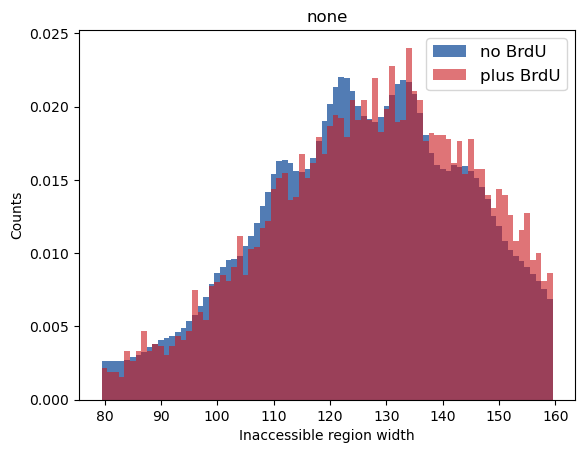

part way done
10,000
100,000
200,000
300,000
done: 54 miss: 75
part way done
10,000
done: 65 miss: 39
part way done
10,000
100,000
200,000
300,000
done: 72 miss: 81
part way done
10,000
100,000
done: 134 miss: 9
part way done
10,000
100,000
200,000
done: 135 miss: 32
part way done
10,000
100,000
done: 146 miss: 7
part way done
10,000
100,000
200,000
done: 147 miss: 30
part way done
10,000
100,000
done: 158 miss: 13
part way done
10,000
100,000
200,000
done: 159 miss: 29
part way done
10,000


KeyboardInterrupt: 

In [7]:
for time in samp_dict.keys():
    hmm_plus = []
    hmm_minus = []
    for samp in samp_dict[time]: 
        miss = 0
        # read in prediction file from assembler4 modeling
        with open(brduPBase + 'brduPrediction/{0}_{1}_brdu_220919_s1_cnn2_t2_adj.pickle'.format(sampleRef['cell'][samp],
                                                                                            sampleRef['sampleName'][samp]), 'rb') as p_fin:
            preds = pickle.load(p_fin)

        HMMout = {}

        # read in HMMv2 outfiles
        zmw_curr = 0
        with open(brduPBase + 'inaccessibleRegions/{0}_{1}_inacRegions.csv'.format(sampleRef['cell'][samp],
                                                                                   sampleRef['sampleName'][samp])) as csvfile:
            i = 0
            lengths = []
            reader = csv.reader(csvfile)
            for row in reader:
                if i == 0: # skip the header
                    i += 1
                else:
                    if zmw_curr == 0:
                        zmw_curr = int(row[1])
                    elif int(row[1]) == zmw_curr:
                        lengths.append(int(row[2]))
                    elif int(row[1]) != zmw_curr:
                        HMMout[zmw_curr] = lengths
                        zmw_curr = int(int(row[1]))
                        lengths = [int(row[2])]

        inacc = HMMout
        print('part way done')
        idx = 0
        for zmw in preds.keys():
            if idx == 10000:
                print('10,000')
            if idx == 100000:
                print('100,000')
            if idx == 200000:
                print('200,000')
            if idx == 300000:
                print('300,000')
            try:
                i_tmp = inacc[zmw]
#                 print(i_tmp)
            except KeyError:
                miss += 1
                continue
            bur = preds[zmw] > 0.85
            if np.nanmean(bur) > 0.3:
                hmm_plus = np.append(hmm_plus,inacc[zmw])
            else:
                hmm_minus = np.append(hmm_minus,inacc[zmw])
            idx+=1
        print('done: ' + str(samp) + ' miss: ' + str(miss))
    inacc_plus = hmm_plus
    inacc_minus = hmm_minus

    plt.hist(inacc_minus, bins=np.arange(79.5,160.5,1),density = True,color='#084594',alpha = 0.7)
    plt.hist(inacc_plus, bins=np.arange(79.5,160.5,1),density = True,color='#cb181d',alpha = 0.6)
    plt.xlabel('Inaccessible region width')
    plt.ylabel('Counts')
    plt.title(str(time))
    plt.legend(['no BrdU', 'plus BrdU'],fontsize = 'large')
    plt.show()
    

In [5]:
len(preds.keys())

323173

# Try above first

In [4]:
# read in the BrdU predictions files and the inaccessible region files

usesamples = [53,54,65,72,134,135,146,147,158,159,170,171,68,75,82,83,106,107,132,133,144,145,156,157,168,169,
              55,66,73,84,85,108,109,130,131,142,143,154,155,166,167,69,76,86,87,110,111,118,121,128,129,140,
              141,152,153,164,165,70,77,126,127,138,139,150,151,162,163,124,125,136,137,148,149,160,161,
              56,67,71,74]
len(usesamples)

# inacc = {}
# preds = {}

inacc_plus = {}
inacc_minus = {}

for samp in usesamples: 
    # read in prediction file from assembler4 modeling
    with open(brduPBase + 'brduPrediction/{0}_{1}_brdu_220919_s1_cnn2_t2_adj.pickle'.format(sampleRef['cell'][samp],
                                                                                        sampleRef['sampleName'][samp]), 'rb') as p_fin:
        preds = pickle.load(p_fin)
    
    HMMout = {}
    
    # read in HMMv2 outfiles
    zmw_curr = 0
    with open(brduPBase + 'inaccessibleRegions/{0}_{1}_inacRegions.csv'.format(sampleRef['cell'][samp],
                                                                               sampleRef['sampleName'][samp])) as csvfile:
        i = 0
        lengths = []
        reader = csv.reader(csvfile)
        for row in reader:
            if i == 0: # skip the header
                i += 1
            else:
                if zmw_curr == 0:
                    zmw_curr = int(row[1])
                elif int(row[1]) == zmw_curr:
                    lengths.append(int(row[2]))
                elif int(row[1]) != zmw_curr:
                    HMMout[zmw_curr] = lengths
                    zmw_curr = int(int(row[1]))
                    lengths = [int(row[2])]
                
    inacc = HMMout
    
    
    hmm_plus = []
    hmm_minus = []
    for zmw in preds:
        try:
            i_tmp = inacc[zmw]
        except KeyError:
            continue
        bur = preds[zmw] > 0.85
        if np.nanmean(bur) > 0.3:
            hmm_plus = np.append(hmm_plus,inacc[zmw])
        else:
            hmm_minus = np.append(hmm_minus,inacc[zmw])
    inacc_plus[samp] = hmm_plus
    inacc_minus[samp] = hmm_minus
            
    print('Done: ' + str(sampleRef['cell'][samp]) + ' - ' + str(sampleRef['sampleName'][samp] + ' length is: ' + str(len(hmm_plus))))    


KeyboardInterrupt: 

In [6]:
none = [53]
five = [54,65,72,134,135,146,147,158,159,170,171]
ten = [68,75,82,83,106,107,132,133,144,145,156,157,168,169]
fifteen = [55,66,73,84,85,108,109,130,131,142,143,154,155,166,167]
oneh = [69,76,86,87,110,111,118,121,128,129,140,141,152,153,164,165]
sixh = [70,77,126,127,138,139,150,151,162,163]
twelveh = [124,125,136,137,148,149,160,161]
oned = [56,67,71,74]


no brdU 258442
plus BrdU 111


Text(0.5, 1.0, 'e14 - no BrdU')

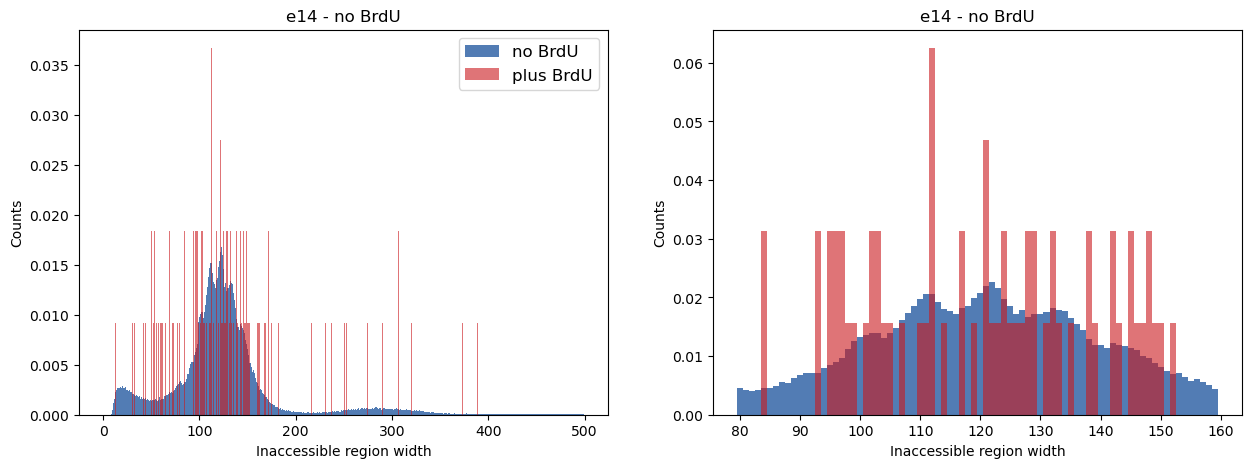

In [7]:
neg = []
pos = []
for samp in none:
    neg.extend(inacc_minus[samp])
    pos.extend(inacc_plus[samp])
    
print('no brdU ' + str(len(neg)))
print('plus BrdU ' + str(len(pos)))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(neg,bins=np.arange(0,500,1),density = True,color='#084594',alpha = 0.7)
ax1.hist(pos,bins=np.arange(0,500,1),density = True,color='#cb181d',alpha = 0.6)
ax1.set_xlabel('Inaccessible region width')
ax1.set_ylabel('Counts')
ax1.set_title('e14 - no BrdU')
ax1.legend(['no BrdU', 'plus BrdU'],fontsize = 'large')

ax2.hist(neg, bins=np.arange(79.5,160.5,1),density = True,color='#084594',alpha = 0.7)
ax2.hist(pos, bins=np.arange(79.5,160.5,1),density = True,color='#cb181d',alpha = 0.6)
ax2.set_xlabel('Inaccessible region width')
ax2.set_ylabel('Counts')
ax2.set_title('e14 - no BrdU')

no brdU 7735505
plus BrdU 27447


Text(0.5, 1.0, 'e14 - 5 minutes BrdU')

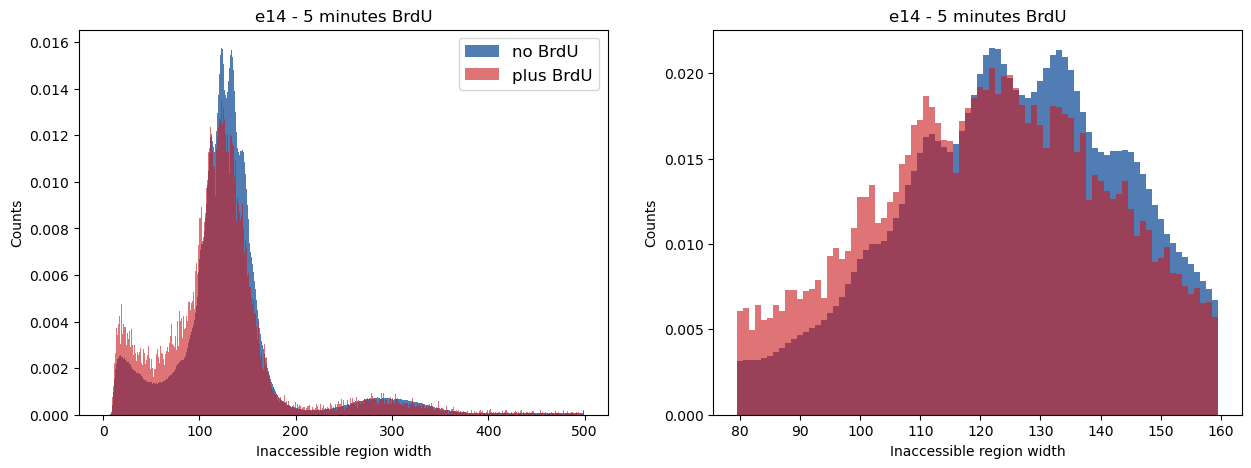

In [8]:
neg = []
pos = []
for samp in five:
    neg.extend(inacc_minus[samp])
    pos.extend(inacc_plus[samp])
    
print('no brdU ' + str(len(neg)))
print('plus BrdU ' + str(len(pos)))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(neg,bins=np.arange(0,500,1),density = True,color='#084594',alpha = 0.7)
ax1.hist(pos,bins=np.arange(0,500,1),density = True,color='#cb181d',alpha = 0.6)
ax1.set_xlabel('Inaccessible region width')
ax1.set_ylabel('Counts')
ax1.set_title('e14 - 5 minutes BrdU')
ax1.legend(['no BrdU', 'plus BrdU'],fontsize = 'large')

ax2.hist(neg, bins=np.arange(79.5,160.5,1),density = True,color='#084594',alpha = 0.7)
ax2.hist(pos, bins=np.arange(79.5,160.5,1),density = True,color='#cb181d',alpha = 0.6)
ax2.set_xlabel('Inaccessible region width')
ax2.set_ylabel('Counts')
ax2.set_title('e14 - 5 minutes BrdU')

no brdU 11587617
plus BrdU 136033


Text(0.5, 1.0, 'e14 - 10 minutes BrdU')

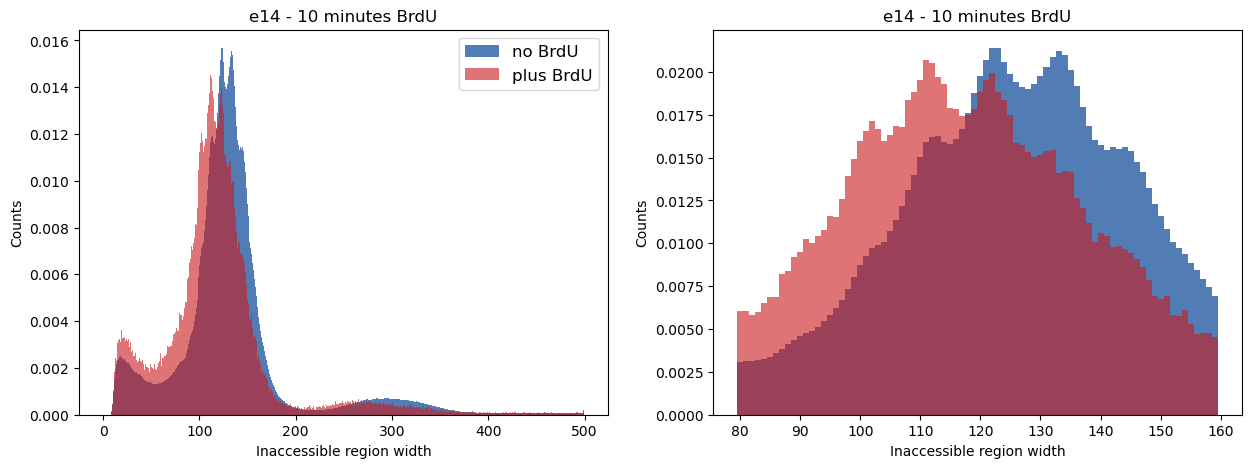

In [9]:
neg = []
pos = []
for samp in ten:
    neg.extend(inacc_minus[samp])
    pos.extend(inacc_plus[samp])
    
print('no brdU ' + str(len(neg)))
print('plus BrdU ' + str(len(pos)))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(neg,bins=np.arange(0,500,1),density = True,color='#084594',alpha = 0.7)
ax1.hist(pos,bins=np.arange(0,500,1),density = True,color='#cb181d',alpha = 0.6)
ax1.set_xlabel('Inaccessible region width')
ax1.set_ylabel('Counts')
ax1.set_title('e14 - 10 minutes BrdU')
ax1.legend(['no BrdU', 'plus BrdU'],fontsize = 'large')

ax2.hist(neg, bins=np.arange(79.5,160.5,1),density = True,color='#084594',alpha = 0.7)
ax2.hist(pos, bins=np.arange(79.5,160.5,1),density = True,color='#cb181d',alpha = 0.6)
ax2.set_xlabel('Inaccessible region width')
ax2.set_ylabel('Counts')
ax2.set_title('e14 - 10 minutes BrdU')

no brdU 9115920
plus BrdU 86678


Text(0.5, 1.0, 'e14 - 15 minutes BrdU')

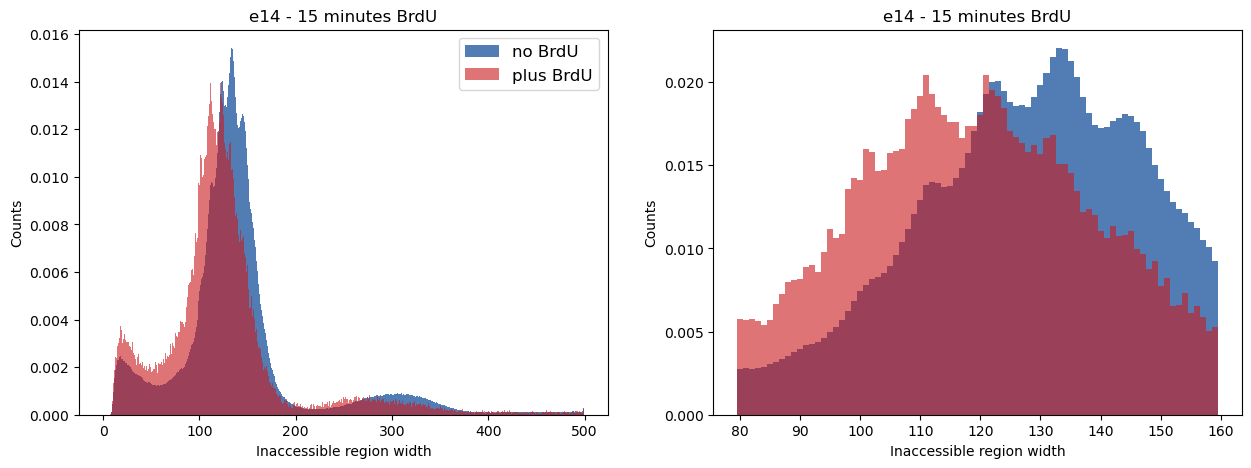

In [10]:
neg = []
pos = []
for samp in fifteen:
    neg.extend(inacc_minus[samp])
    pos.extend(inacc_plus[samp])
    
print('no brdU ' + str(len(neg)))
print('plus BrdU ' + str(len(pos)))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(neg,bins=np.arange(0,500,1),density = True,color='#084594',alpha = 0.7)
ax1.hist(pos,bins=np.arange(0,500,1),density = True,color='#cb181d',alpha = 0.6)
ax1.set_xlabel('Inaccessible region width')
ax1.set_ylabel('Counts')
ax1.set_title('e14 - 15 minutes BrdU')
ax1.legend(['no BrdU', 'plus BrdU'],fontsize = 'large')

ax2.hist(neg, bins=np.arange(79.5,160.5,1),density = True,color='#084594',alpha = 0.7)
ax2.hist(pos, bins=np.arange(79.5,160.5,1),density = True,color='#cb181d',alpha = 0.6)
ax2.set_xlabel('Inaccessible region width')
ax2.set_ylabel('Counts')
ax2.set_title('e14 - 15 minutes BrdU')

no brdU 7367435
plus BrdU 273572


Text(0.5, 1.0, 'e14 - 1 hour BrdU')

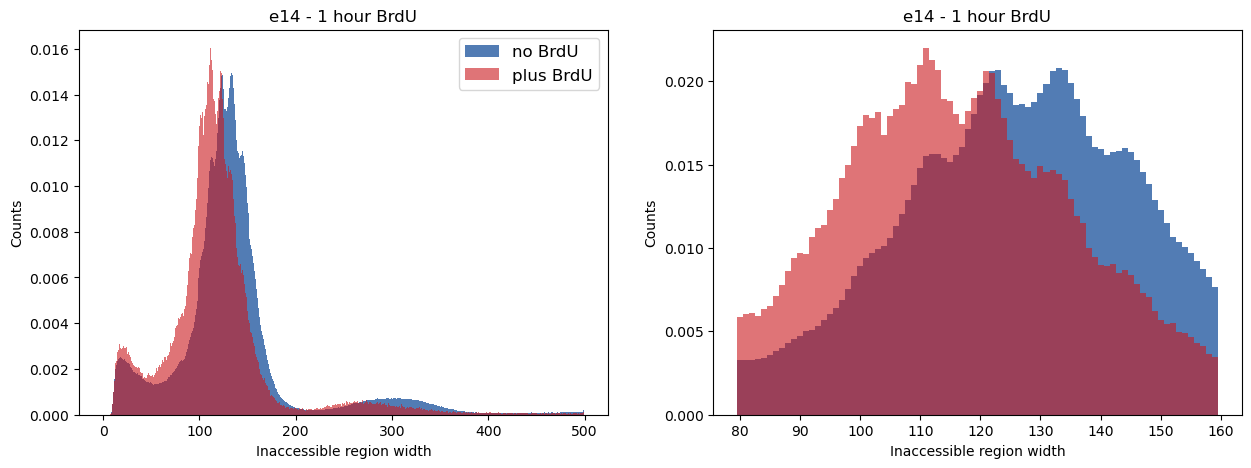

In [11]:
neg = []
pos = []
for samp in oneh:
    neg.extend(inacc_minus[samp])
    pos.extend(inacc_plus[samp])
    
print('no brdU ' + str(len(neg)))
print('plus BrdU ' + str(len(pos)))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(neg,bins=np.arange(0,500,1),density = True,color='#084594',alpha = 0.7)
ax1.hist(pos,bins=np.arange(0,500,1),density = True,color='#cb181d',alpha = 0.6)
ax1.set_xlabel('Inaccessible region width')
ax1.set_ylabel('Counts')
ax1.set_title('e14 - 1 hour BrdU')
ax1.legend(['no BrdU', 'plus BrdU'],fontsize = 'large')

ax2.hist(neg, bins=np.arange(79.5,160.5,1),density = True,color='#084594',alpha = 0.7)
ax2.hist(pos, bins=np.arange(79.5,160.5,1),density = True,color='#cb181d',alpha = 0.6)
ax2.set_xlabel('Inaccessible region width')
ax2.set_ylabel('Counts')
ax2.set_title('e14 - 1 hour BrdU')

no brdU 7974944
plus BrdU 655344


Text(0.5, 1.0, 'e14 - 6 hours BrdU')

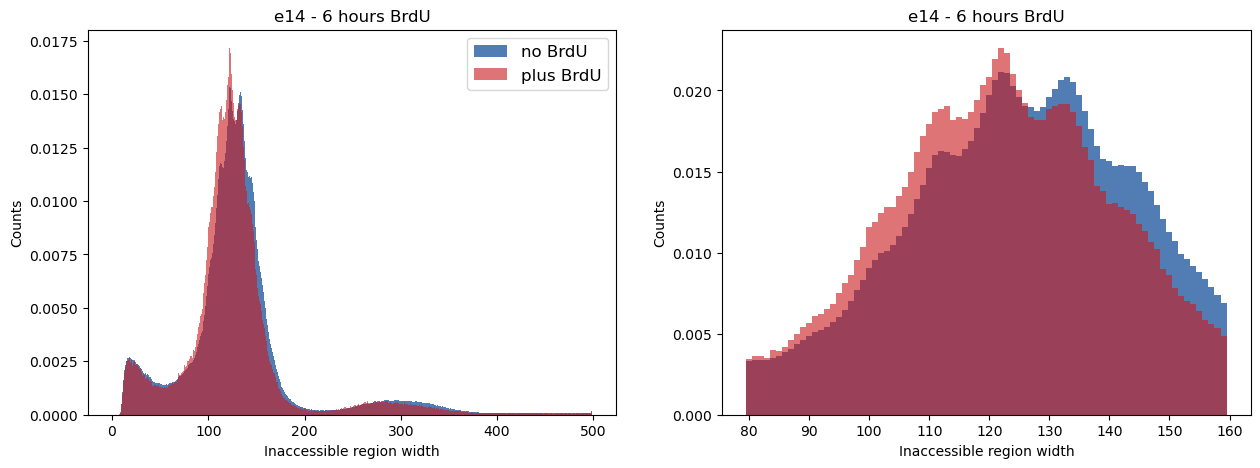

In [12]:
neg = []
pos = []
for samp in sixh:
    neg.extend(inacc_minus[samp])
    pos.extend(inacc_plus[samp])
    
print('no brdU ' + str(len(neg)))
print('plus BrdU ' + str(len(pos)))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(neg,bins=np.arange(0,500,1),density = True,color='#084594',alpha = 0.7)
ax1.hist(pos,bins=np.arange(0,500,1),density = True,color='#cb181d',alpha = 0.6)
ax1.set_xlabel('Inaccessible region width')
ax1.set_ylabel('Counts')
ax1.set_title('e14 - 6 hours BrdU')
ax1.legend(['no BrdU', 'plus BrdU'],fontsize = 'large')

ax2.hist(neg, bins=np.arange(79.5,160.5,1),density = True,color='#084594',alpha = 0.7)
ax2.hist(pos, bins=np.arange(79.5,160.5,1),density = True,color='#cb181d',alpha = 0.6)
ax2.set_xlabel('Inaccessible region width')
ax2.set_ylabel('Counts')
ax2.set_title('e14 - 6 hours BrdU')

no brdU 5853357
plus BrdU 430180


Text(0.5, 1.0, 'e14 - 24 hours BrdU')

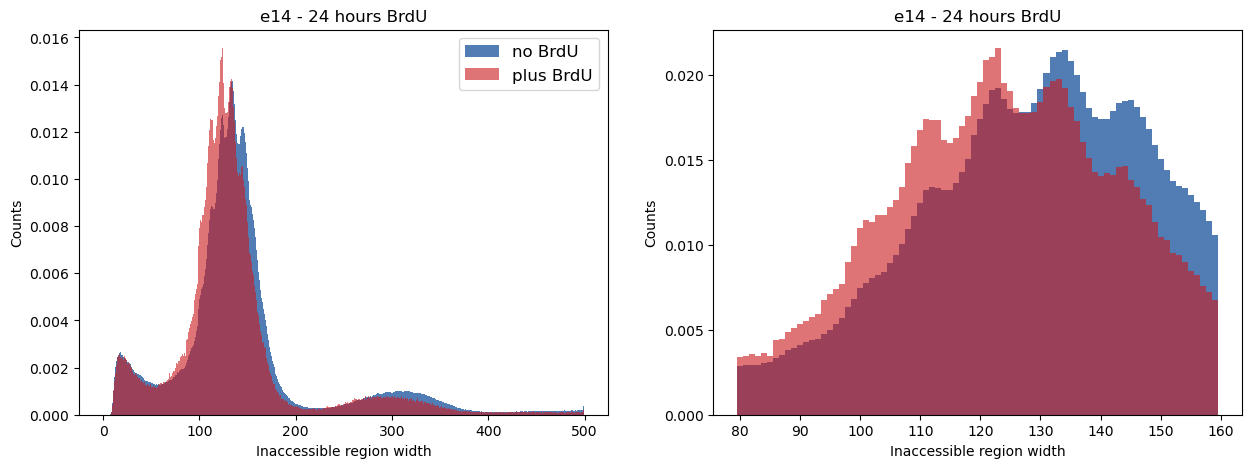

In [13]:
neg = []
pos = []
for samp in oned:
    neg.extend(inacc_minus[samp])
    pos.extend(inacc_plus[samp])
    
print('no brdU ' + str(len(neg)))
print('plus BrdU ' + str(len(pos)))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(neg,bins=np.arange(0,500,1),density = True,color='#084594',alpha = 0.7)
ax1.hist(pos,bins=np.arange(0,500,1),density = True,color='#cb181d',alpha = 0.6)
ax1.set_xlabel('Inaccessible region width')
ax1.set_ylabel('Counts')
ax1.set_title('e14 - 24 hours BrdU')
ax1.legend(['no BrdU', 'plus BrdU'],fontsize = 'large')

ax2.hist(neg, bins=np.arange(79.5,160.5,1),density = True,color='#084594',alpha = 0.7)
ax2.hist(pos, bins=np.arange(79.5,160.5,1),density = True,color='#cb181d',alpha = 0.6)
ax2.set_xlabel('Inaccessible region width')
ax2.set_ylabel('Counts')
ax2.set_title('e14 - 24 hours BrdU')

### K562s

no brdU 7953764
plus BrdU 97565


Text(0.5, 1.0, '10 minutes BrdU')

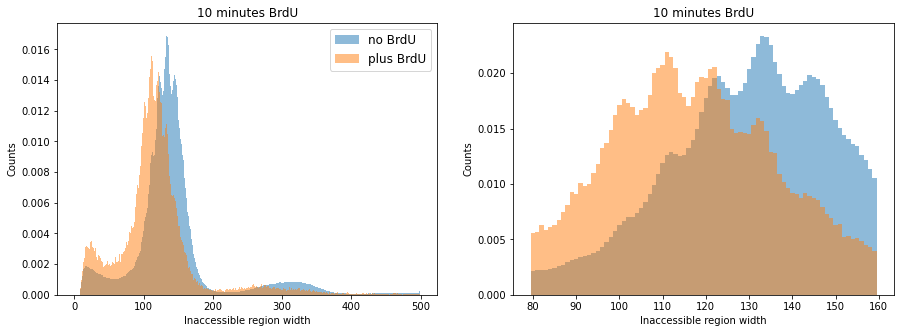

In [27]:
# 10 minutes: 38

negconone = []
onehour = []
for samp in [38]:
    negconone.extend(minus_inacc_9[samp])
    onehour.extend(plus_inacc_9[samp])
    

print('no brdU ' + str(len(negconone)))
print('plus BrdU ' + str(len(onehour)))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(negconone,bins=np.arange(0,500,1),density = True,alpha = 0.5)
ax1.hist(onehour,bins=np.arange(0,500,1),density = True,alpha = 0.5)
ax1.set_xlabel('Inaccessible region width')
ax1.set_ylabel('Counts')
ax1.set_title('10 minutes BrdU')
ax1.legend(['no BrdU', 'plus BrdU'],fontsize = 'large')

ax2.hist(negconone, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
ax2.hist(onehour, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
ax2.set_xlabel('Inaccessible region width')
ax2.set_ylabel('Counts')
ax2.set_title('10 minutes BrdU')

no brdU 4692497
plus BrdU 621894


Text(0.5, 1.0, '2 hours BrdU')

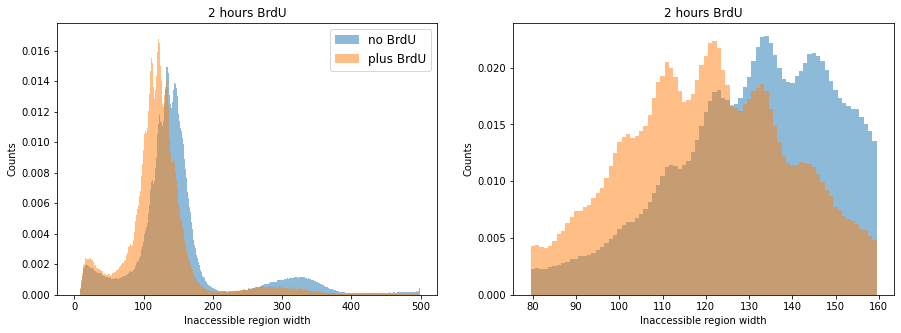

In [29]:
# 2 hours: 37

negconone = []
onehour = []
for samp in [37]:
    negconone.extend(minus_inacc_9[samp])
    onehour.extend(plus_inacc_9[samp])
    

print('no brdU ' + str(len(negconone)))
print('plus BrdU ' + str(len(onehour)))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(negconone,bins=np.arange(0,500,1),density = True,alpha = 0.5)
ax1.hist(onehour,bins=np.arange(0,500,1),density = True,alpha = 0.5)
ax1.set_xlabel('Inaccessible region width')
ax1.set_ylabel('Counts')
ax1.set_title('2 hours BrdU')
ax1.legend(['no BrdU', 'plus BrdU'],fontsize = 'large')

ax2.hist(negconone, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
ax2.hist(onehour, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
ax2.set_xlabel('Inaccessible region width')
ax2.set_ylabel('Counts')
ax2.set_title('2 hours BrdU')

no brdU 771308
plus BrdU 38752


Text(0.5, 1.0, '4 and a half hours BrdU')

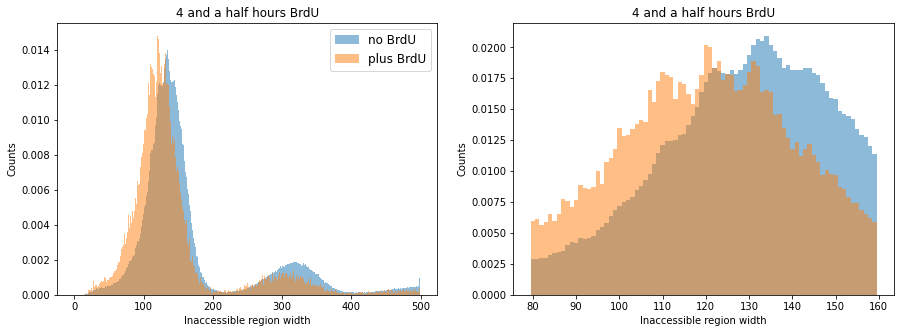

In [31]:
# 4.5 hours: 6,7

negconone = []
onehour = []
for samp in [6,7]:
    negconone.extend(minus_inacc_9[samp])
    onehour.extend(plus_inacc_9[samp])
    

print('no brdU ' + str(len(negconone)))
print('plus BrdU ' + str(len(onehour)))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(negconone,bins=np.arange(0,500,1),density = True,alpha = 0.5)
ax1.hist(onehour,bins=np.arange(0,500,1),density = True,alpha = 0.5)
ax1.set_xlabel('Inaccessible region width')
ax1.set_ylabel('Counts')
ax1.set_title('4 and a half hours BrdU')
ax1.legend(['no BrdU', 'plus BrdU'],fontsize = 'large')

ax2.hist(negconone, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
ax2.hist(onehour, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
ax2.set_xlabel('Inaccessible region width')
ax2.set_ylabel('Counts')
ax2.set_title('4 and a half hours BrdU')

no brdU 2642274
plus BrdU 6460175


Text(0.5, 1.0, '24 hours BrdU')

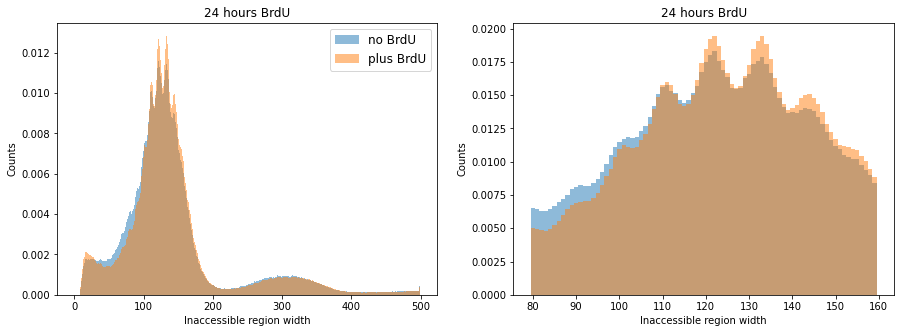

In [33]:
# 24 hours BrdU K562: 10,11,36

negconone = []
onehour = []
for samp in [10,11,36]:
    negconone.extend(minus_inacc_9[samp])
    onehour.extend(plus_inacc_9[samp])
    

print('no brdU ' + str(len(negconone)))
print('plus BrdU ' + str(len(onehour)))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(negconone,bins=np.arange(0,500,1),density = True,alpha = 0.5)
ax1.hist(onehour,bins=np.arange(0,500,1),density = True,alpha = 0.5)
ax1.set_xlabel('Inaccessible region width')
ax1.set_ylabel('Counts')
ax1.set_title('24 hours BrdU')
ax1.legend(['no BrdU', 'plus BrdU'],fontsize = 'large')

ax2.hist(negconone, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
ax2.hist(onehour, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
ax2.set_xlabel('Inaccessible region width')
ax2.set_ylabel('Counts')
ax2.set_title('24 hours BrdU')

### CTCF-degron

* treated:
    * 10 min: 88,89
    * 15 min: 90,91
    * 1 hr: 92,93
* Untreated
    * 10 min: 82,83
    * 15 min: 84,85
    * 1 hr: 86,87

treated no brdU 763387
treated plus BrdU 283505
untreated no brdU 803983
untreated plus BrdU 242607


Text(0.5, 1.0, '10 minutes BrdU')

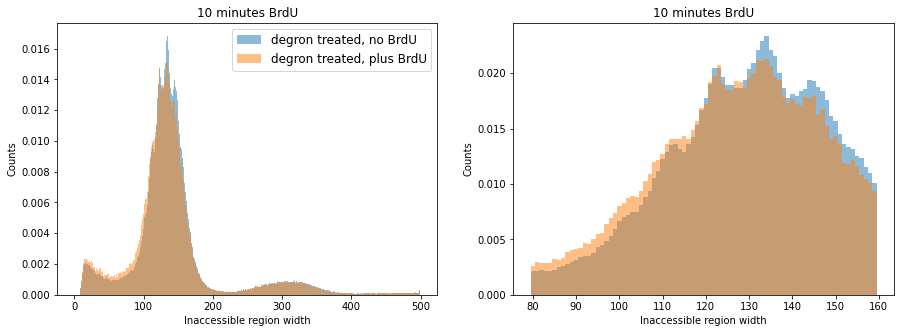

In [177]:
# CTCF-degron 10 min
# treated: 88,89
# untreated: 82,83

treated_minus = []
treated_plus = []
untreated_minus = []
untreated_plus = []

for samp in [88,89]: # treated samples
    treated_minus.extend(minus_inacc[samp])
    treated_plus.extend(plus_inacc[samp])
for samp in [82,83]: # untreated samples
    untreated_minus.extend(minus_inacc[samp])
    untreated_plus.extend(plus_inacc[samp])    
    

print('treated no brdU ' + str(len(treated_minus)))
print('treated plus BrdU ' + str(len(treated_plus)))
print('untreated no brdU ' + str(len(untreated_minus)))
print('untreated plus BrdU ' + str(len(untreated_plus)))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(treated_minus,bins=np.arange(0,500,1),density = True,alpha = 0.5)
ax1.hist(treated_plus,bins=np.arange(0,500,1),density = True,alpha = 0.5)
# ax1.hist(untreated_minus,bins=np.arange(0,500,1),density = True,alpha = 0.5)
# ax1.hist(untreated_plus,bins=np.arange(0,500,1),density = True,alpha = 0.5)
ax1.set_xlabel('Inaccessible region width')
ax1.set_ylabel('Counts')
ax1.set_title('10 minutes BrdU')
# ax1.legend(['degron treated, no BrdU', 'degron treated, plus BrdU','untreated, no BrdU','untreated, plus BrdU'])
ax1.legend(['degron treated, no BrdU', 'degron treated, plus BrdU'], fontsize = 'large')

ax2.hist(treated_minus, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
ax2.hist(treated_plus, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
# ax2.hist(untreated_minus, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
# ax2.hist(untreated_plus, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
ax2.set_xlabel('Inaccessible region width')
ax2.set_ylabel('Counts')
ax2.set_title('10 minutes BrdU')

treated no brdU 803085
treated plus BrdU 320738
untreated no brdU 724016
untreated plus BrdU 219528


Text(0.5, 1.0, '15 minutes BrdU')

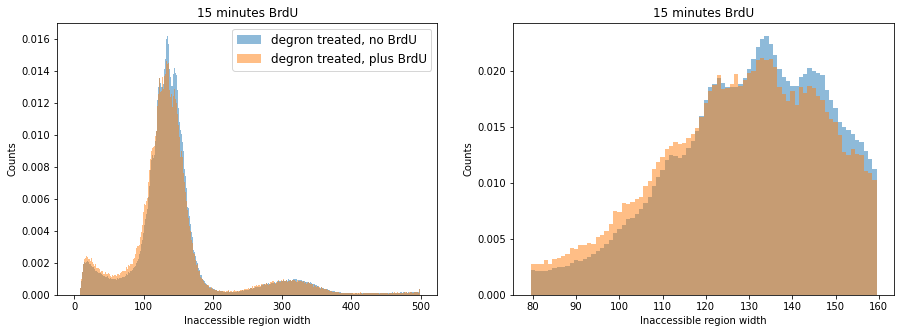

In [178]:
# CTCF-degron 15 min
# treated: 90,91
# untreated: 84,85

treated_minus = []
treated_plus = []
untreated_minus = []
untreated_plus = []

for samp in [90,91]: # treated samples
    treated_minus.extend(minus_inacc[samp])
    treated_plus.extend(plus_inacc[samp])
for samp in [84,85]: # untreated samples
    untreated_minus.extend(minus_inacc[samp])
    untreated_plus.extend(plus_inacc[samp])    
    

print('treated no brdU ' + str(len(treated_minus)))
print('treated plus BrdU ' + str(len(treated_plus)))
print('untreated no brdU ' + str(len(untreated_minus)))
print('untreated plus BrdU ' + str(len(untreated_plus)))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(treated_minus,bins=np.arange(0,500,1),density = True,alpha = 0.5)
ax1.hist(treated_plus,bins=np.arange(0,500,1),density = True,alpha = 0.5)
# ax1.hist(untreated_minus,bins=np.arange(0,500,1),density = True,alpha = 0.5)
# ax1.hist(untreated_plus,bins=np.arange(0,500,1),density = True,alpha = 0.5)
ax1.set_xlabel('Inaccessible region width')
ax1.set_ylabel('Counts')
ax1.set_title('15 minutes BrdU')
# ax1.legend(['degron treated, no BrdU', 'degron treated, plus BrdU','untreated, no BrdU','untreated, plus BrdU'])
ax1.legend(['degron treated, no BrdU', 'degron treated, plus BrdU'], fontsize = 'large')

ax2.hist(treated_minus, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
ax2.hist(treated_plus, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
# ax2.hist(untreated_minus, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
# ax2.hist(untreated_plus, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
ax2.set_xlabel('Inaccessible region width')
ax2.set_ylabel('Counts')
ax2.set_title('15 minutes BrdU')

treated no brdU 694948
treated plus BrdU 362880
untreated no brdU 834051
untreated plus BrdU 297625


Text(0.5, 1.0, '1 hour BrdU')

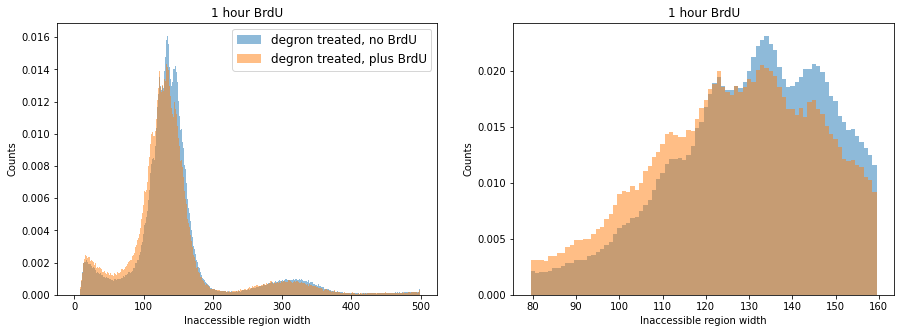

In [179]:
# CTCF-degron 1 hour
# treated: 92,93
# untreated: 86,87

treated_minus = []
treated_plus = []
untreated_minus = []
untreated_plus = []

for samp in [92,93]: # treated samples
    treated_minus.extend(minus_inacc[samp])
    treated_plus.extend(plus_inacc[samp])
for samp in [86,87]: # untreated samples
    untreated_minus.extend(minus_inacc[samp])
    untreated_plus.extend(plus_inacc[samp])    
    

print('treated no brdU ' + str(len(treated_minus)))
print('treated plus BrdU ' + str(len(treated_plus)))
print('untreated no brdU ' + str(len(untreated_minus)))
print('untreated plus BrdU ' + str(len(untreated_plus)))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(treated_minus,bins=np.arange(0,500,1),density = True,alpha = 0.5)
ax1.hist(treated_plus,bins=np.arange(0,500,1),density = True,alpha = 0.5)
# ax1.hist(untreated_minus,bins=np.arange(0,500,1),density = True,alpha = 0.5)
# ax1.hist(untreated_plus,bins=np.arange(0,500,1),density = True,alpha = 0.5)
ax1.set_xlabel('Inaccessible region width')
ax1.set_ylabel('Counts')
ax1.set_title('1 hour BrdU')
# ax1.legend(['degron treated, no BrdU', 'degron treated, plus BrdU','untreated, no BrdU','untreated, plus BrdU'])
ax1.legend(['degron treated, no BrdU', 'degron treated, plus BrdU'], fontsize = 'large')

ax2.hist(treated_minus, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
ax2.hist(treated_plus, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
# ax2.hist(untreated_minus, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
# ax2.hist(untreated_plus, bins=np.arange(79.5,160.5,1),density = True,alpha = 0.5)
ax2.set_xlabel('Inaccessible region width')
ax2.set_ylabel('Counts')
ax2.set_title('1 hour BrdU')

# Percentage of reads called as + BrdU and - BrdU

In [6]:
usesamples = [0,2,3,6,7,8,10,11,14,15,16,17,19,20,21,22,23,24,25,26,27,28,29,30,31,35,36,37,
              38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,65,66,67,68,69,70,71,72,
              73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93] # all samples as of 01/07/23


perc_plus = {}
perc_minus = {}
readsn = {}

perc_plus_arr = []
perc_minus_arr = []

for samp in usesamples:
    num_plus = len(plus_b[samp])
    num_minus = len(minus_b[samp])
    total = num_plus + num_minus

    perc_plus[samp] = num_plus/total * 100
    perc_minus[samp] = num_minus/total * 100
    
    perc_plus_arr.append(num_plus/total * 100)
    perc_minus_arr.append(num_minus/total * 100)
    readsn[samp] = total
    

# print(perc_plus)
# print(perc_minus)

print(readsn)


{0: 32146, 2: 22000, 3: 19437, 6: 23645, 7: 65605, 8: 67132, 10: 100507, 11: 91474, 14: 568954, 15: 278292, 16: 876921, 17: 270995, 19: 30519, 20: 25414, 21: 31668, 22: 24437, 23: 28565, 24: 25326, 25: 22661, 26: 27115, 27: 15634, 28: 29477, 29: 156822, 30: 158106, 31: 97248, 35: 229296, 36: 297855, 37: 214651, 38: 304180, 39: 253390, 40: 319563, 41: 218315, 42: 244858, 43: 596, 44: 779, 45: 1557, 46: 30, 47: 80239, 48: 365, 49: 708, 50: 3463, 51: 241, 52: 4, 53: 323149, 54: 334605, 55: 457501, 56: 293696, 57: 306308, 58: 312353, 59: 367066, 60: 346943, 65: 67867, 66: 62014, 67: 50566, 68: 38742, 69: 26732, 70: 36755, 71: 38885, 72: 358310, 73: 341148, 74: 275354, 75: 280893, 76: 149777, 77: 249270, 78: 391164, 79: 362716, 80: 423052, 81: 336132, 82: 25313, 83: 24621, 84: 26302, 85: 18516, 86: 23498, 87: 31018, 88: 17073, 89: 18706, 90: 16074, 91: 20670, 92: 14633, 93: 18921}


In [7]:
# make a dictionary of sample types and indices

stdict = {}

stdict['no_brdu_e14'] = [19,43,53]
stdict['no_brdu_k562'] = [2,3,35]
stdict['ten_min_brdu_e14'] = [21,45,68,75,82,83]
stdict['ten_min_brdu_k562'] = [38]
stdict['twentyfour_h_brdu_e14'] = [27,51,56,67,71,74]
stdict['twentyfour_h_brdu_k562'] = [10,11,36]

stdict['five_min_brdu_e14'] = [54,65,72]
stdict['fifteen_min_brdu_e14'] = [55,66,73,84,85]
stdict['one_h_brdu_e14'] = [23,47,69,76,86,87]
stdict['six_h_brdu_e14'] = [25,49,70,77]

stdict['two_h_brdu_k562'] = [37]
stdict['four_half_h_brdu_k562'] = [6,7]

stdict['twentyfour_h_cldu'] = [78,80]
stdict['twentyfour_h_idu'] = [79,81]

print(stdict)

{'no_brdu_e14': [19, 43, 53], 'no_brdu_k562': [2, 3, 35], 'ten_min_brdu_e14': [21, 45, 68, 75, 82, 83], 'ten_min_brdu_k562': [38], 'twentyfour_h_brdu_e14': [27, 51, 56, 67, 71, 74], 'twentyfour_h_brdu_k562': [10, 11, 36], 'five_min_brdu_e14': [54, 65, 72], 'fifteen_min_brdu_e14': [55, 66, 73, 84, 85], 'one_h_brdu_e14': [23, 47, 69, 76, 86, 87], 'six_h_brdu_e14': [25, 49, 70, 77], 'two_h_brdu_k562': [37], 'four_half_h_brdu_k562': [6, 7], 'twentyfour_h_cldu': [78, 80], 'twentyfour_h_idu': [79, 81]}


In [8]:
for samp in [19,43,53]:
    print(perc_plus[samp])
    print(readsn[samp])

0.03276647334447393
30519
0.5033557046979865
596
0.164320483739699
323149


In [5]:
# weighting averages by number of reads
frac_all = {}
for st in stdict:
    top = len(stdict[st])
    numer = 0
    denom = 0

    for i in range(0,top):
        sn = stdict[st][i]
        numer += perc_plus[sn]*readsn[sn]
        denom += readsn[sn]
#     frac = numer / ((i+1) * denom)
    frac = numer / denom
    frac_all[st] = frac
print(frac_all)

{'no_brdu_e14': 11.858670370119459, 'no_brdu_k562': 15.415187657212087, 'ten_min_brdu_e14': 18.17703342155047, 'ten_min_brdu_k562': 19.061082253928596, 'twentyfour_h_brdu_e14': 53.178345611350345, 'twentyfour_h_brdu_k562': 93.2812206534432, 'five_min_brdu_e14': 12.516857654360908, 'fifteen_min_brdu_e14': 13.670634723423241, 'one_h_brdu_e14': 24.28162399324366, 'six_h_brdu_e14': 51.3154747668022, 'two_h_brdu_k562': 29.613186055504045, 'four_half_h_brdu_k562': 10.434733893557423, 'twentyfour_h_cldu': 56.40137260874264, 'twentyfour_h_idu': 63.73889601172215}


Text(0.5, 1.0, 'e14 and K562')

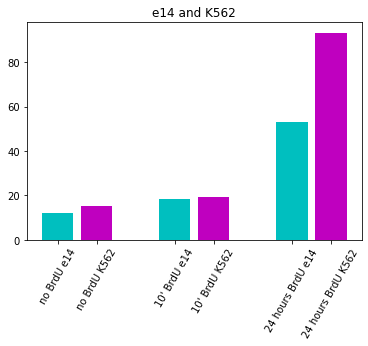

In [6]:
# weighting averages by number of reads
test = [frac_all['no_brdu_e14'],frac_all['no_brdu_k562'],frac_all['ten_min_brdu_e14'],
        frac_all['ten_min_brdu_k562'],frac_all['twentyfour_h_brdu_e14'],frac_all['twentyfour_h_brdu_k562']]

plt.bar([0,1,3,4,6,7],test, color = ['c','m','c','m','c','m'])
# plt.ylim([0,2])
plt.xticks(ticks = [0,1,3,4,6,7], 
           labels = ['no BrdU e14', 'no BrdU K562', "10' BrdU e14", "10' BrdU K562",'24 hours BrdU e14','24 hours BrdU K562'],
          rotation = 60)
plt.title('e14 and K562')

Text(0.5, 1.0, 'e14')

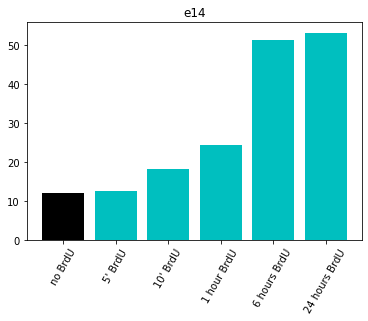

In [7]:
# weighting averages by number of reads
e14s = [frac_all['no_brdu_e14'],frac_all['five_min_brdu_e14'],frac_all['ten_min_brdu_e14'],
        frac_all['one_h_brdu_e14'],frac_all['six_h_brdu_e14'],frac_all['twentyfour_h_brdu_e14']]

plt.bar([0,1,2,3,4,5],e14s, color = ['k','c','c','c','c','c'])
# plt.ylim([0,1])
plt.xticks(ticks = [0,1,2,3,4,5], 
           labels = ['no BrdU', "5' BrdU", "10' BrdU", '1 hour BrdU', '6 hours BrdU','24 hours BrdU'],
          rotation = 60)
plt.title('e14')

Text(0.5, 1.0, 'K562')

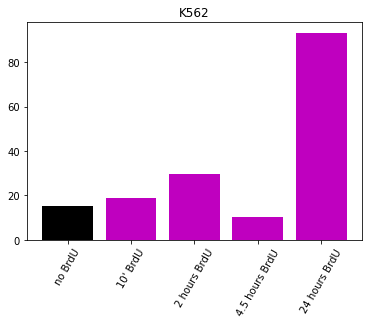

In [8]:
# weighting averages by number of reads
k562s = [frac_all['no_brdu_k562'],frac_all['ten_min_brdu_k562'],frac_all['two_h_brdu_k562'],
        frac_all['four_half_h_brdu_k562'],frac_all['twentyfour_h_brdu_k562']]

plt.bar([0,1,2,3,4],k562s, color = ['k','m','m','m','m'])
plt.xticks(ticks = [0,1,2,3,4], 
           labels = ['no BrdU',"10' BrdU", '2 hours BrdU', '4.5 hours BrdU','24 hours BrdU'],
          rotation = 60)
plt.title('K562')

Text(0.5, 1.0, 'Nucleotide analog comparison')

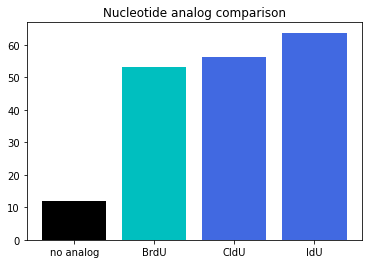

In [9]:
# weighting averages by number of reads
clduidu = [frac_all['no_brdu_e14'],frac_all['twentyfour_h_brdu_e14'],frac_all['twentyfour_h_cldu'],
        frac_all['twentyfour_h_idu']]

plt.bar([0,1,2,3],clduidu, color = ['k','c','royalblue','royalblue'])
plt.xticks(ticks = [0,1,2,3,], 
           labels = ['no analog', "BrdU", "CldU", 'IdU'])
plt.title('Nucleotide analog comparison')

# Comparing max to different facets of the read
* ccs passes
* read length
* variance

In [9]:
# reading in unique.pickle files
# usesamples = [19,43,53,27,51,56,67,71,74]

# usesamples = [19,20,21,22,23,24,25,26,27,28,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,65,66,67,68,69,
#               70,71,72,73,74,75,76,77,78,79,80,81] # all samples as of 01/07/23 - minus 0520_K562 and 2207_K562

usesamples = [14,15,16,17,31] # positive and negative controls

pred_all = {}
max_all = {}

for samp in usesamples:
    max_tmp = {}
    with open(brduPBase + 'brduPrediction/{0}_{1}_brdu_220919_s1_cnn2_t2_unique.pickle'.format(sampleRef['cell'][samp],
                                                                     sampleRef['sampleName'][samp]), 'rb') as m_fin:
        preds = pickle.load(m_fin)
        
        for zmw in preds.keys():
            max_tmp[zmw] = np.max(preds[zmw])
        
    pred_all[samp] = preds
    max_all[samp] = max_tmp


In [10]:
max_all.keys()

dict_keys([14, 15, 16, 17, 31])

In [11]:
for key in list(pred_all.keys()):
    print(len(max_all[key]))

568954
278292
876921
270995
97248


In [12]:
pred_all[14]

{23: [0.49650243, 0.48561743, 0.51247066],
 30: [0.48187315],
 41: [0.3868365, 0.45344326, 0.48650342],
 111: [0.32267442, 0.4453611],
 141: [0.6193072, 0.59904575],
 143: [0.48997974, 0.5719609, 0.52063113],
 180: [0.44788665, 0.4284202],
 192: [0.5232474, 0.5472983, 0.542261],
 205: [0.55988884, 0.46127033],
 208: [0.51648533, 0.636042, 0.47741008, 0.5441375],
 228: [0.7200714, 0.53154594],
 239: [0.3136108, 0.30791402],
 252: [0.47494888, 0.5450555, 0.5244508],
 299: [0.54592997, 0.52782255, 0.57219183],
 316: [0.5153249, 0.58294934],
 327: [0.5040604, 0.60401064, 0.5681356],
 330: [0.49242258, 0.60924226, 0.5874939],
 351: [0.3907265, 0.6143609, 0.5526566, 0.5642864],
 352: [0.51895463, 0.57269835, 0.5252957],
 354: [0.4973512, 0.5278388, 0.547687],
 363: [0.53933287, 0.5411818, 0.5904162],
 369: [0.3937691, 0.36636838],
 374: [0.5693123, 0.5094806, 0.54744375],
 381: [0.33323205, 0.40056437],
 382: [0.59633625, 0.49340174, 0.559185, 0.49542385],
 383: [0.48497933, 0.50791866, 0.56

### CCS passes / AT content

stored in .bam file

In [13]:
# Read in ccs bam files to get the number of passes
import pysam

percAT_all = {}
np_all = {}

# usesamples = [19,20,21,22,23,24,25,26,27,28,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,65,66,67,68,69,
#               70,71,72,73,74,75,76,77,78,79,80,81] # all samples as of 01/07/23 - minus 0520_K562 and 2207_K562

usesamples = [14,15,16,17,31] # positive and negative controls


for samp in usesamples:
    percAT = {}
    passes = {}
    
    if samp == 53 or samp == 54 or samp == 55 or samp == 56 or samp == 57 or samp == 58 or samp == 59 or samp == 60:
        inf = hmmPBase + '{0}/ccs_MO/{0}.split.{1}.ccs.bam'.format(sampleRef['cell'][samp],
                                                                sampleRef['sampleName'][samp],'rb')
        bamfile = pysam.AlignmentFile(inf, "rb", check_sq=False)

        for read in bamfile:  ## start loop and iterate over each bam
            zmw = read.get_tag('zm')  ## store zmw value
            
            passes[zmw] = read.get_tag('np')  ## store np value
            
            
            seque = read.seq ## store sequence value
            
            As = seque.count('A')
            Ts = seque.count('T')
            AT = As + Ts

            percAT[zmw] = AT/len(seque)*100 # percent of bases in the read that are A or T
            
            

        percAT_all[samp] = percAT
        np_all[samp] = passes
        
    else:
        inf = hmmPBase + '{0}/ccs/{0}.split.{1}.ccs.bam'.format(sampleRef['cell'][samp],
                                                                sampleRef['sampleName'][samp],'rb')
        bamfile = pysam.AlignmentFile(inf, "rb", check_sq=False)

        for read in bamfile:  ## start loop and iterate over each bam
            zmw = read.get_tag('zm')  ## store zmw value
            
            passes[zmw] = read.get_tag('np')  ## store np value
            
            
            seque = read.seq ## store sequence value
            
            As = seque.count('A')
            Ts = seque.count('T')
            AT = As + Ts

            percAT[zmw] = AT/len(seque)*100 # percent of bases in the read that are A or T
            
            

        percAT_all[samp] = percAT
        np_all[samp] = passes    


[E::idx_find_and_load] Could not retrieve index file for '/wynton/group/goodarzilab/ramanilab/results/pacbio/210930_MO_E14_K562_BrdU/ccs/210930_MO_E14_K562_BrdU.split.E14_dNTP.ccs.bam'
[E::idx_find_and_load] Could not retrieve index file for '/wynton/group/goodarzilab/ramanilab/results/pacbio/210930_MO_E14_K562_BrdU/ccs/210930_MO_E14_K562_BrdU.split.E14_BrdU.ccs.bam'
[E::idx_find_and_load] Could not retrieve index file for '/wynton/group/goodarzilab/ramanilab/results/pacbio/210930_MO_E14_K562_BrdU/ccs/210930_MO_E14_K562_BrdU.split.K562_dNTP.ccs.bam'
[E::idx_find_and_load] Could not retrieve index file for '/wynton/group/goodarzilab/ramanilab/results/pacbio/210930_MO_E14_K562_BrdU/ccs/210930_MO_E14_K562_BrdU.split.K562_BrdU.ccs.bam'
[E::idx_find_and_load] Could not retrieve index file for '/wynton/group/goodarzilab/ramanilab/results/pacbio/220722_BrdUTP_methcontrols/ccs/220722_BrdUTP_methcontrols.split.100_BrdUTP_meth.ccs.bam'


In [15]:
for key in list(percAT_all.keys()):
    print(key)
    print(len(percAT_all[key]))
    print(len(np_all[key]))

14
687585
687585
15
429439
429439
16
1033266
1033266
17
402384
402384
31
245518
245518


In [16]:
# match up predictions and number of passes by zmw numbers


# usesamples = [19,20,21,22,23,24,25,26,27,28,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,65,66,67,68,69,
#               70,71,72,73,74,75,76,77,78,79,80,81] # all samples as of 01/07/23 - minus 0520_K562 and 2207_K562

# usesamples = [19,20,21,22,23,24,25,26,27,28,53,54,55,56,57,58,59,60,65,66,67,68,69,
#               70,71,72,73,74,75,76,77,78,79,80,81] # all samples as of 01/07/23 - minus 0520_K562 and 2207_K562

usesamples = [14,15,16,17,31] # positive and negative controls


np_plot = {}
pred_plot = {}

for samp in usesamples:
    np_list = []
    pred_list = []
    for zmw in list(pred_all[samp].keys()):
        np_tmp = np_all[samp][zmw]
        rep = len(pred_all[samp][zmw])
        passes = [np_tmp] * rep
        np_list.extend(passes)
        
        pred_list.extend(pred_all[samp][zmw])
#     print(len(np_list))
#     print(len(pred_list))
    
    np_plot[samp] = np_list
    pred_plot[samp] = pred_list
    
    print(str(samp) + ': ' + str(len(np_plot[samp])))
    print(str(samp) + ': ' + str(len(pred_plot[samp])))

14: 1537684
14: 1537684
15: 696763
15: 696763
16: 2556819
16: 2556819
17: 709968
17: 709968
31: 226823
31: 226823


In [17]:
# match up predictions and A/T content by zmw numbers


# usesamples = [19,20,21,22,23,24,25,26,27,28,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,65,66,67,68,69,
#               70,71,72,73,74,75,76,77,78,79,80,81] # all samples as of 01/07/23 - minus 0520_K562 and 2207_K562

# usesamples = [19,20,21,22,23,24,25,26,27,28,53,54,55,56,57,58,59,60,65,66,67,68,69,
#               70,71,72,73,74,75,76,77,78,79,80,81] # all samples as of 01/07/23 - minus 0520_K562 and 2207_K562

usesamples = [14,15,16,17,31] # positive and negative controls


AT_plot = {}
pred_plot = {}

for samp in usesamples:
    AT_list = []
    pred_list = []
    for zmw in list(pred_all[samp].keys()):
        percAT_tmp = percAT_all[samp][zmw]
        rep = len(pred_all[samp][zmw])
        AT_rep = [percAT_tmp] * rep
        AT_list.extend(AT_rep)
        
        pred_list.extend(pred_all[samp][zmw])
#     print(len(AT_list))
#     print(len(pred_list))
    
    AT_plot[samp] = AT_list
    pred_plot[samp] = pred_list
    
    print(str(samp) + ': ' + str(len(AT_plot[samp])))
    print(str(samp) + ': ' + str(len(pred_plot[samp])))

14: 1537684
14: 1537684
15: 696763
15: 696763
16: 2556819
16: 2556819
17: 709968
17: 709968
31: 226823
31: 226823


In [18]:
# match up maximum predictions and number of passes by zmw numbers


# usesamples = [19,20,21,22,23,24,25,26,27,28,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,65,66,67,68,69,
#               70,71,72,73,74,75,76,77,78,79,80,81] # all samples as of 01/07/23 - minus 0520_K562 and 2207_K562

# usesamples = [19,20,21,22,23,24,25,26,27,28,53,54,55,56,57,58,59,60,65,66,67,68,69,
#               70,71,72,73,74,75,76,77,78,79,80,81] # all samples as of 01/07/23 - minus 0520_K562 and 2207_K562

usesamples = [14,15,16,17,31] # positive and negative controls

np_max_plot = {}
pred_max_plot = {}

for samp in usesamples:
    np_max_list = []
    pred_max_list = []
    for zmw in list(max_all[samp].keys()):
        passes = np_all[samp][zmw]
        np_max_list.append(passes)
        pred_max_list.append(max_all[samp][zmw])
    
#     print(len(np_max_list))
#     print(len(pred_max_list))
    
    np_max_plot[samp] = np_max_list
    pred_max_plot[samp] = pred_max_list
    
    print(str(samp) + ': ' + str(len(np_max_plot[samp])))
    print(str(samp) + ': ' + str(len(pred_max_plot[samp])))

14: 568954
14: 568954
15: 278292
15: 278292
16: 876921
16: 876921
17: 270995
17: 270995
31: 97248
31: 97248


In [19]:
# match up maximum predictions and A/T content by zmw numbers


# usesamples = [19,20,21,22,23,24,25,26,27,28,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,65,66,67,68,69,
#               70,71,72,73,74,75,76,77,78,79,80,81] # all samples as of 01/07/23 - minus 0520_K562 and 2207_K562

# usesamples = [19,20,21,22,23,24,25,26,27,28,53,54,55,56,57,58,59,60,65,66,67,68,69,
#               70,71,72,73,74,75,76,77,78,79,80,81] # all samples as of 01/07/23 - minus 0520_K562 and 2207_K562

usesamples = [14,15,16,17,31] # positive and negative controls

AT_max_plot = {}
pred_max_plot = {}

for samp in usesamples:
    AT_max_list = []
    pred_max_list = []
    for zmw in list(max_all[samp].keys()):
        percAT_tmp = percAT_all[samp][zmw]
        AT_max_list.append(percAT_tmp)
        pred_max_list.append(max_all[samp][zmw])
    
#     print(len(AT_max_list))
#     print(len(pred_max_list))
    
    AT_max_plot[samp] = AT_max_list
    pred_max_plot[samp] = pred_max_list
    
    print(str(samp) + ': ' + str(len(AT_max_plot[samp])))
    print(str(samp) + ': ' + str(len(pred_max_plot[samp])))

14: 568954
14: 568954
15: 278292
15: 278292
16: 876921
16: 876921
17: 270995
17: 270995
31: 97248
31: 97248


In [20]:
for samp in usesamples:
    print('sample index: ' + str(samp))
    print(len(np_plot[samp]))
    print(len(AT_plot[samp]))
    print(len(pred_plot[samp]))
    print(len(np_max_plot[samp]))
    print(len(AT_max_plot[samp]))
    print(len(pred_max_plot[samp]))

sample index: 14
1537684
1537684
1537684
568954
568954
568954
sample index: 15
696763
696763
696763
278292
278292
278292
sample index: 16
2556819
2556819
2556819
876921
876921
876921
sample index: 17
709968
709968
709968
270995
270995
270995
sample index: 31
226823
226823
226823
97248
97248
97248


### A/T content plotting

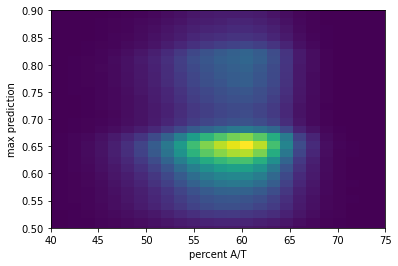

In [150]:
# 2D hist of A/T content vs length - MAX PREDICTIONS

usesamples = [19,20,21,22,23,24,25,26,27,28,53,54,55,56,57,58,59,60,65,66,67,68,69,
              70,71,72,73,74,75,76,77,78,79,80,81] # all samples as of 01/07/23 - minus 0520_K562 and 2207_K562




max_ext = []
percAT_ext = []

for samp in usesamples:
    max_ext.extend(pred_max_plot[samp])
    percAT_ext.extend(AT_max_plot[samp])    

max_ext = np.array(max_ext)
percAT_ext = np.array(percAT_ext)
percAT_ext = percAT_ext[~np.isnan(max_ext)]
max_ext = max_ext[~np.isnan(max_ext)]


plt.hist2d(percAT_ext, max_ext, bins = 60)
plt.xlabel('percent A/T')
plt.ylabel('max prediction')
# plotter.colorbar(histo[3], extend='min')
plt.xlim([40,75])
plt.ylim([0.5,0.9])
plt.show()

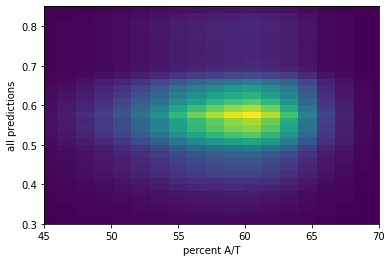

In [155]:
# 2D hist of A/T content vs length - ALL PREDICTIONS

usesamples = [19,20,21,22,23,24,25,26,27,28,53,54,55,56,57,58,59,60,65,66,67,68,69,
              70,71,72,73,74,75,76,77,78,79,80,81] # all samples as of 01/07/23 - minus 0520_K562 and 2207_K562


pred_ext = []
percAT_all_ext = []

for samp in usesamples:
    pred_ext.extend(pred_plot[samp])
    percAT_all_ext.extend(AT_plot[samp])    

pred_ext = np.array(pred_ext)
percAT_all_ext = np.array(percAT_all_ext)
percAT_all_ext = percAT_all_ext[~np.isnan(pred_ext)]
pred_ext = pred_ext[~np.isnan(pred_ext)]


plt.hist2d(percAT_all_ext, pred_ext, bins = 60)
plt.xlabel('percent A/T')
plt.ylabel('all predictions')
# plotter.colorbar(histo[3], extend='min')
plt.xlim([45,70])
plt.ylim([0.3,0.85])
plt.show()

#### PCR control data - A/T content

In [24]:
# PCR control data
# 2D hist of A/T content vs length - MAX PREDICTIONS

pos_cont = [15, 17, 31] # positive controls
neg_cont = [14, 16] # negative controls

pos_max_pred_ext = []
pos_percAT_ext = []

neg_max_pred_ext = []
neg_percAT_ext = []

for samp in pos_cont:
    pos_max_pred_ext.extend(pred_max_plot[samp])
    pos_percAT_ext.extend(AT_max_plot[samp])    
    
for samp in neg_cont:
    neg_max_pred_ext.extend(pred_max_plot[samp])
    neg_percAT_ext.extend(AT_max_plot[samp])
    
    
pos_max_pred_ext = np.array(pos_max_pred_ext)
pos_percAT_ext = np.array(pos_percAT_ext)
neg_max_pred_ext = np.array(neg_max_pred_ext)
neg_percAT_ext = np.array(neg_percAT_ext)


pos_percAT_ext = pos_percAT_ext[~np.isnan(pos_max_pred_ext)]
pos_max_pred_ext = pos_max_pred_ext[~np.isnan(pos_max_pred_ext)]
neg_percAT_ext = neg_percAT_ext[~np.isnan(neg_max_pred_ext)]
neg_max_pred_ext = neg_max_pred_ext[~np.isnan(neg_max_pred_ext)]


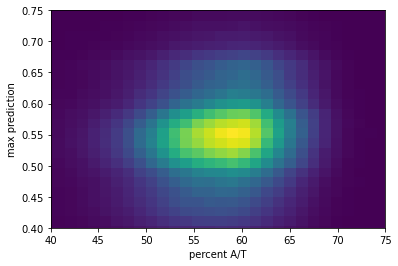

In [28]:
plt.hist2d(neg_percAT_ext, neg_max_pred_ext, bins = 60)
plt.xlabel('percent A/T')
plt.ylabel('max prediction')
# plotter.colorbar(histo[3], extend='min')
plt.xlim([40,75])
plt.ylim([0.4,0.75])
plt.show()

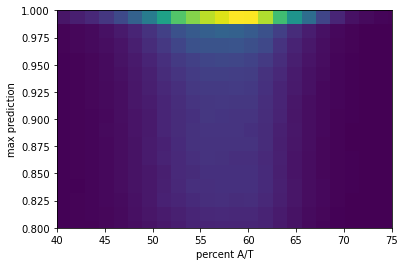

In [30]:
plt.hist2d(pos_percAT_ext, pos_max_pred_ext, bins = 60)
plt.xlabel('percent A/T')
plt.ylabel('max prediction')
# plotter.colorbar(histo[3], extend='min')
plt.xlim([40,75])
plt.ylim([0.8,1])
plt.show()

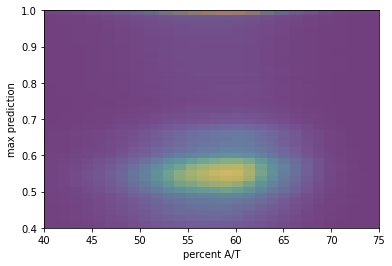

In [34]:
# overlaid plotting

plt.hist2d(pos_percAT_ext, pos_max_pred_ext, bins = 60, alpha = 0.5)
plt.hist2d(neg_percAT_ext, neg_max_pred_ext, bins = 60, alpha = 0.5)
plt.xlabel('percent A/T')
plt.ylabel('max prediction')
# plotter.colorbar(histo[3], extend='min')
plt.xlim([40,75])
plt.ylim([0.4,1])
plt.show()

### Number of passes plotting

[0.5 0.  1.  1. ]
[0.17058824 0.49465584 0.9667184  1.        ]
[0.16666667 0.8660254  0.8660254  1.        ]
[0.50392157 0.99998103 0.70492555 1.        ]
[0.83333333 0.8660254  0.5        1.        ]
[1.         0.49465584 0.25584278 1.        ]
[1.0000000e+00 1.2246468e-16 6.1232340e-17 1.0000000e+00]


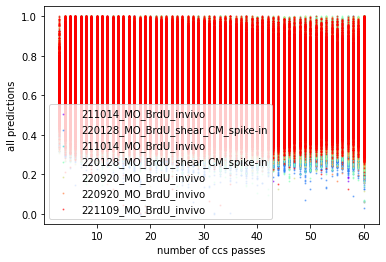

In [128]:
from matplotlib.pyplot import cm
import numpy as np

usesamples = [19,53,27,56,67,71,74]
colors = cm.rainbow(np.linspace(0, 1, len(usesamples)))
# colors = ['r', 'k','b']

i = 0
labels = []
for samp in usesamples:
    c = colors[i]
    plt.scatter(np_plot[samp], pred_plot[samp], s = 1, color = c, alpha=0.5)
    print(c)
    labels.append(sampleRef['cell'][samp])
    
    i += 1
plt.xlabel('number of ccs passes')
plt.ylabel('all predictions')
plt.legend(labels, loc = 'lower left')

[0.5 0.  1.  1. ]
[0.24901961 0.38410575 0.98063477 1.        ]
[0.00196078 0.70928131 0.92328911 1.        ]
[0.25294118 0.92563766 0.83018403 1.        ]
[0.50392157 0.99998103 0.70492555 1.        ]
[0.75490196 0.92090552 0.55236497 1.        ]
[1.         0.70054304 0.37841105 1.        ]
[1.         0.37270199 0.18980109 1.        ]
[1.0000000e+00 1.2246468e-16 6.1232340e-17 1.0000000e+00]


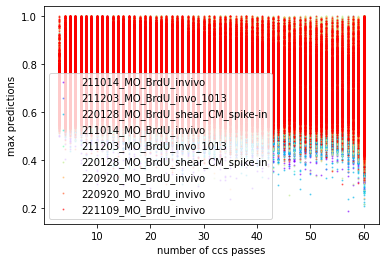

In [350]:
usesamples = [19,43,53,27,51,56,67,71,74]
colors = cm.rainbow(np.linspace(0, 1, len(usesamples)))
# colors = ['r', 'k','b']

i = 0
labels = []
for samp in usesamples:
    c = colors[i]
    plt.scatter(np_max_plot[samp], pred_max_plot[samp], s = 1, color = c, alpha=0.5)
    print(c)
    labels.append(sampleRef['cell'][samp])
    
    i += 1
plt.xlabel('number of ccs passes')
plt.ylabel('max predictions')
plt.legend(labels, loc = 'lower left')

### Read length

In [253]:
#Run if necessary to merge piece or block files

import glob
from tqdm import tqdm

for samp in [67,71,74]:
    hmmDict={}
    binmol = {}
    
    hmmPieces = glob.glob('{0}{1}/processed/full/{1}_{2}_block*_full.pickle'.format(hmmPBase,
                                                                                        sampleRef['cell'][samp],
                                                                                        sampleRef['sampleName'][samp]))
    
    
    
    hmmPieces = sorted(hmmPieces)

    for piece in tqdm(hmmPieces, position=0):
        with open(piece,'rb') as fopen:
            hmmPart = pickle.load(fopen)
        hmmDict.update(hmmPart)
    
    # save the output as a file
    with open(hmmPBase + '{0}/processed/full/{0}_{1}_full.pickle'.format(sampleRef['cell'][samp],
                                                                                        sampleRef['sampleName'][samp]), 'wb') as fout:
        pickle.dump(hmmDict, fout, protocol=4)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:20<00:00, 13.46s/it]


In [352]:
lenall = {}

for samp in [19,43,53,27,51,56,67,71,74]:
    if samp == 53 or samp == 56:
        samplengths = {}
        with open(hmmPBase + '{0}/processed_MO/full/{0}_{1}_full.pickle'.format(sampleRef['cell'][samp],
                                                                                 sampleRef['sampleName'][samp]), 'rb') as m_fin:
            datain = pickle.load(m_fin)
            for zmw in datain.keys():
                rl = len(datain[zmw]['read'])
                samplengths[zmw] = rl
            lenall[samp] = samplengths    
    
    else:
        samplengths = {}
        with open(hmmPBase + '{0}/processed/full/{0}_{1}_full.pickle'.format(sampleRef['cell'][samp],
                                                                                 sampleRef['sampleName'][samp]), 'rb') as m_fin:
            datain = pickle.load(m_fin)
            for zmw in datain.keys():
                rl = len(datain[zmw]['read'])
                samplengths[zmw] = rl
            lenall[samp] = samplengths
    

In [353]:
for key in list(lenall.keys()):
    print(len(lenall[key]))

65949
596
323599
115414
241
294345
51294
39340
277085


In [354]:
# match up predictions and read length by zmw numbers

usesamples = [19,43,53,27,51,56,67,71,74]
len_plot = {}

for samp in usesamples:
    len_list = []
    for zmw in list(pred_all[samp].keys()):
        len_tmp = lenall[samp][zmw]
        rep = len(pred_all[samp][zmw])
        len_rep = [len_tmp] * rep
        len_list.extend(len_rep)
        
#         pred_list.extend(pred_all[samp][zmw])
    print(len(len_list))
    print(len(pred_plot[samp]))
    
    len_plot[samp] = len_list
#     pred_plot[samp] = pred_list
    

70118
70118
12051
12051
2615587
2615587
33184
33184
5139
5139
2182839
2182839
311405
311405
443234
443234
2056287
2056287


In [355]:
# match up maximum predictions and read length by zmw numbers

usesamples = [19,43,53,27,51,56,67,71,74]
len_max_plot = {}

for samp in usesamples:
    len_max_list = []
    for zmw in list(pred_all[samp].keys()):
        len_rep = lenall[samp][zmw]
        len_max_list.append(len_rep)
        
    print(len(len_max_list))
    print(len(pred_max_plot[samp]))
    
    len_max_plot[samp] = len_max_list
    

30519
30519
596
596
323173
323173
15634
15634
241
241
293716
293716
50569
50569
38889
38889
275372
275372


In [356]:
for samp in usesamples:
    print(len(len_plot[samp]))
    print(len(pred_plot[samp]))

70118
70118
12051
12051
2615587
2615587
33184
33184
5139
5139
2182839
2182839
311405
311405
443234
443234
2056287
2056287


In [357]:
for samp in usesamples:
    print(len(len_max_plot[samp]))
    print(len(pred_max_plot[samp]))

30519
30519
596
596
323173
323173
15634
15634
241
241
293716
293716
50569
50569
38889
38889
275372
275372


[0.5 0.  1.  1. ]
[0.24901961 0.38410575 0.98063477 1.        ]
[0.00196078 0.70928131 0.92328911 1.        ]
[0.25294118 0.92563766 0.83018403 1.        ]
[0.50392157 0.99998103 0.70492555 1.        ]
[0.75490196 0.92090552 0.55236497 1.        ]
[1.         0.70054304 0.37841105 1.        ]
[1.         0.37270199 0.18980109 1.        ]
[1.0000000e+00 1.2246468e-16 6.1232340e-17 1.0000000e+00]


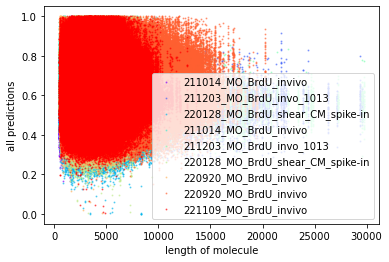

In [358]:
usesamples = [19,43,53,27,51,56,67,71,74]
colors = cm.rainbow(np.linspace(0, 1, len(usesamples)))
# colors = ['r', 'k','b']

i = 0
labels = []
for samp in usesamples:
    c = colors[i]
    plt.scatter(len_plot[samp], pred_plot[samp], s = 1, color = c, alpha=0.5)
    print(c)
    labels.append(sampleRef['cell'][samp])
    
    i += 1
plt.xlabel('length of molecule')
plt.ylabel('all predictions')
plt.legend(labels, loc = 'lower right')

[0.5 0.  1.  1. ]
[0.24901961 0.38410575 0.98063477 1.        ]
[0.00196078 0.70928131 0.92328911 1.        ]
[0.25294118 0.92563766 0.83018403 1.        ]
[0.50392157 0.99998103 0.70492555 1.        ]
[0.75490196 0.92090552 0.55236497 1.        ]
[1.         0.70054304 0.37841105 1.        ]
[1.         0.37270199 0.18980109 1.        ]
[1.0000000e+00 1.2246468e-16 6.1232340e-17 1.0000000e+00]


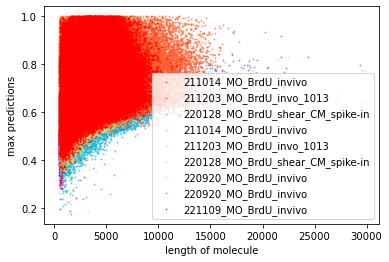

In [359]:
usesamples = [19,43,53,27,51,56,67,71,74]
colors = cm.rainbow(np.linspace(0, 1, len(usesamples)))
# colors = ['r', 'k','b']

i = 0
labels = []
for samp in usesamples:
    c = colors[i]
    plt.scatter(len_max_plot[samp], pred_max_plot[samp], s = 1, color = c, alpha=0.5)
    print(c)
    labels.append(sampleRef['cell'][samp])
    
    i += 1
plt.xlabel('length of molecule')
plt.ylabel('max predictions')
plt.legend(labels, loc = 'lower right')

[0.5 0.  1.  1. ]
[0.24901961 0.38410575 0.98063477 1.        ]
[0.00196078 0.70928131 0.92328911 1.        ]
[0.25294118 0.92563766 0.83018403 1.        ]
[0.50392157 0.99998103 0.70492555 1.        ]
[0.75490196 0.92090552 0.55236497 1.        ]
[1.         0.70054304 0.37841105 1.        ]
[1.         0.37270199 0.18980109 1.        ]
[1.0000000e+00 1.2246468e-16 6.1232340e-17 1.0000000e+00]


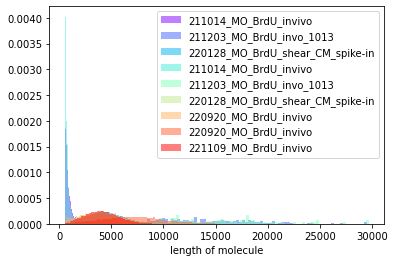

In [360]:
i = 0
labels = []
for samp in usesamples:
    c = colors[i]
    plt.hist(len_plot[samp], color = c, alpha=0.5, density = True, bins = 100)
    print(c)
    labels.append(sampleRef['cell'][samp])
    
    i += 1
plt.xlabel('length of molecule')
plt.legend(labels)

[0.5 0.  1.  1. ]
[0.24901961 0.38410575 0.98063477 1.        ]
[0.00196078 0.70928131 0.92328911 1.        ]
[0.25294118 0.92563766 0.83018403 1.        ]
[0.50392157 0.99998103 0.70492555 1.        ]
[0.75490196 0.92090552 0.55236497 1.        ]
[1.         0.70054304 0.37841105 1.        ]
[1.         0.37270199 0.18980109 1.        ]
[1.0000000e+00 1.2246468e-16 6.1232340e-17 1.0000000e+00]


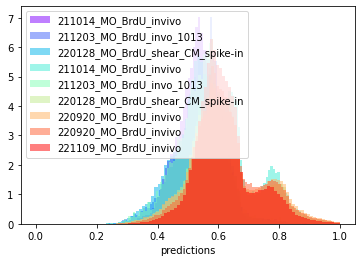

In [361]:
i = 0
labels = []
for samp in usesamples:
    c = colors[i]
    plt.hist(pred_plot[samp], color = c, alpha=0.5, density = True, bins = 100)
    print(c)
    labels.append(sampleRef['cell'][samp])
    
    i += 1
plt.xlabel('predictions')
plt.legend(labels, loc = 'upper left')

[0.5 0.  1.  1. ]
[0.24901961 0.38410575 0.98063477 1.        ]
[0.00196078 0.70928131 0.92328911 1.        ]
[0.25294118 0.92563766 0.83018403 1.        ]
[0.50392157 0.99998103 0.70492555 1.        ]
[0.75490196 0.92090552 0.55236497 1.        ]
[1.         0.70054304 0.37841105 1.        ]
[1.         0.37270199 0.18980109 1.        ]
[1.0000000e+00 1.2246468e-16 6.1232340e-17 1.0000000e+00]


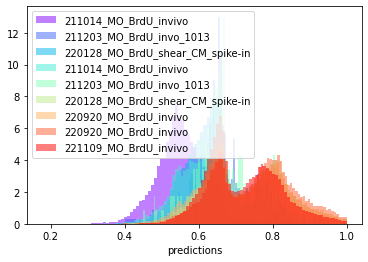

In [362]:
i = 0
labels = []
for samp in usesamples:
    c = colors[i]
    plt.hist(pred_max_plot[samp], color = c, alpha=0.5, density = True, bins = 100)
    print(c)
    labels.append(sampleRef['cell'][samp])
    
    i += 1
plt.xlabel('predictions')
plt.legend(labels, loc = 'upper left')

[0.5 0.  1.  1. ]
[0.24901961 0.38410575 0.98063477 1.        ]
[0.00196078 0.70928131 0.92328911 1.        ]
[0.25294118 0.92563766 0.83018403 1.        ]
[0.50392157 0.99998103 0.70492555 1.        ]
[0.75490196 0.92090552 0.55236497 1.        ]
[1.         0.70054304 0.37841105 1.        ]
[1.         0.37270199 0.18980109 1.        ]
[1.0000000e+00 1.2246468e-16 6.1232340e-17 1.0000000e+00]


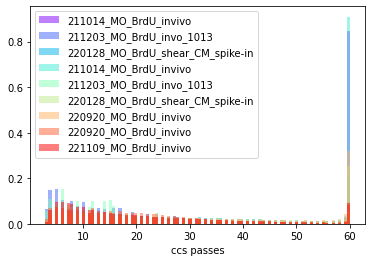

In [363]:
i = 0
labels = []
for samp in usesamples:
    c = colors[i]
    plt.hist(np_plot[samp], color = c, alpha=0.5, density = True, bins = 100)
    print(c)
    labels.append(sampleRef['cell'][samp])
    
    i += 1
plt.xlabel('ccs passes')
plt.legend(labels, loc = 'upper left')

In [383]:
# calculate variance and match up with prediction zmw numbers


usesamples = [19,43,53,27,51,56,67,71,74]

var_plot = {}
var_all = {}

for samp in usesamples:
    var_list = []
    var_dict = {}
    for zmw in list(pred_all[samp].keys()):
        var_tmp = np.var(pred_all[samp][zmw])
        var_list.append(var_tmp)
        var_dict[zmw] = var_tmp
        
    
    var_all[samp] = var_dict
    var_plot[samp] = var_list

In [384]:
for samp in usesamples:
    print(len(var_plot[samp]))
    print(len(var_all[samp]))
    print(len(pred_max_plot[samp]))

30519
30519
30519
596
596
596
323173
323173
323173
15634
15634
15634
241
241
241
293716
293716
293716
50569
50569
50569
38889
38889
38889
275372
275372
275372


[0.5 0.  1.  1. ]
[0.24901961 0.38410575 0.98063477 1.        ]
[0.00196078 0.70928131 0.92328911 1.        ]
[0.25294118 0.92563766 0.83018403 1.        ]
[0.50392157 0.99998103 0.70492555 1.        ]
[0.75490196 0.92090552 0.55236497 1.        ]
[1.         0.70054304 0.37841105 1.        ]
[1.         0.37270199 0.18980109 1.        ]
[1.0000000e+00 1.2246468e-16 6.1232340e-17 1.0000000e+00]


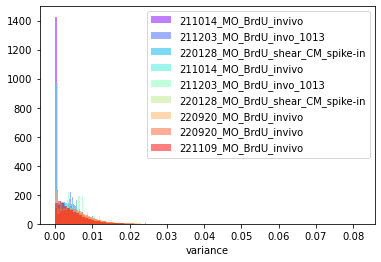

In [366]:
i = 0
labels = []
for samp in usesamples:
    c = colors[i]
    plt.hist(var_plot[samp], color = c, alpha=0.5, density = True, bins = 100)
    print(c)
    labels.append(sampleRef['cell'][samp])
    
    i += 1
plt.xlabel('variance')
plt.legend(labels, loc = 'upper right')

[0.5 0.  1.  1. ]
[0.24901961 0.38410575 0.98063477 1.        ]
[0.00196078 0.70928131 0.92328911 1.        ]
[0.25294118 0.92563766 0.83018403 1.        ]
[0.50392157 0.99998103 0.70492555 1.        ]
[0.75490196 0.92090552 0.55236497 1.        ]
[1.         0.70054304 0.37841105 1.        ]
[1.         0.37270199 0.18980109 1.        ]
[1.0000000e+00 1.2246468e-16 6.1232340e-17 1.0000000e+00]


(0.0, 400.0)

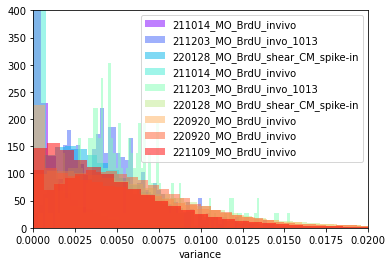

In [367]:
i = 0
labels = []
for samp in usesamples:
    c = colors[i]
    plt.hist(var_plot[samp], color = c, alpha=0.5, density = True, bins = 100)
    print(c)
    labels.append(sampleRef['cell'][samp])
    
    i += 1
plt.xlabel('variance')
plt.legend(labels, loc = 'upper right')
plt.xlim([0,0.02])
plt.ylim([0,400])

[0.5 0.  1.  1. ]
[0.24901961 0.38410575 0.98063477 1.        ]
[0.00196078 0.70928131 0.92328911 1.        ]
[0.25294118 0.92563766 0.83018403 1.        ]
[0.50392157 0.99998103 0.70492555 1.        ]
[0.75490196 0.92090552 0.55236497 1.        ]
[1.         0.70054304 0.37841105 1.        ]
[1.         0.37270199 0.18980109 1.        ]
[1.0000000e+00 1.2246468e-16 6.1232340e-17 1.0000000e+00]


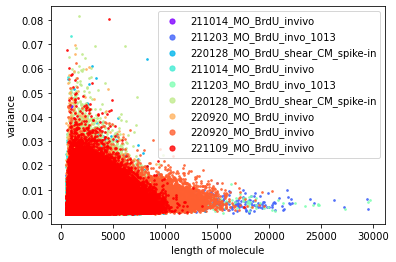

In [368]:
usesamples = [19,43,53,27,51,56,67,71,74]
colors = cm.rainbow(np.linspace(0, 1, len(usesamples)))
# colors = ['r', 'k','b']
# colors = ['b','k','r']


i = 0
labels = []
for samp in usesamples:
    c = colors[i]
    plt.scatter(len_max_plot[samp], var_plot[samp], s = 3, color = c, alpha=0.8)
    print(c)
    labels.append(sampleRef['cell'][samp])
    
    i += 1
plt.xlabel('length of molecule')
plt.ylabel('variance')
plt.legend(labels, loc = 'upper right', markerscale=3)

[0.5 0.  1.  1. ]
[0.24901961 0.38410575 0.98063477 1.        ]
[0.00196078 0.70928131 0.92328911 1.        ]
[0.25294118 0.92563766 0.83018403 1.        ]
[0.50392157 0.99998103 0.70492555 1.        ]
[0.75490196 0.92090552 0.55236497 1.        ]
[1.         0.70054304 0.37841105 1.        ]
[1.         0.37270199 0.18980109 1.        ]
[1.0000000e+00 1.2246468e-16 6.1232340e-17 1.0000000e+00]


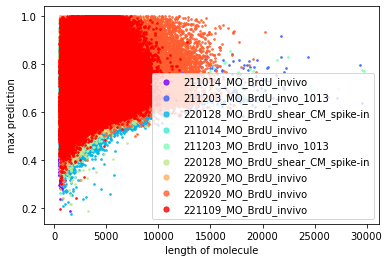

In [369]:
usesamples = [19,43,53,27,51,56,67,71,74]
colors = cm.rainbow(np.linspace(0, 1, len(usesamples)))
# colors = ['r', 'k','b']
# colors = ['b','k','r']


i = 0
labels = []
for samp in usesamples:
    c = colors[i]
    plt.scatter(len_max_plot[samp], pred_max_plot[samp], s = 3, color = c, alpha=0.8)
    print(c)
    labels.append(sampleRef['cell'][samp])
    
    i += 1
plt.xlabel('length of molecule')
plt.ylabel('max prediction')
plt.legend(labels, loc = 'lower right', markerscale=3)

In [370]:
# 2D hist of max prediction vs length
usesamples = [19,43,53,27,51,56,67,71,74]
len_max_ext = []
pred_max_ext = []

for samp in usesamples:
    len_max_ext.extend(len_max_plot[samp])
    pred_max_ext.extend(pred_max_plot[samp])
    
pred_max_ext = np.array(pred_max_ext)
pred_max_ext_p = pred_max_ext[~np.isnan(pred_max_ext)]

len_max_ext = np.array(len_max_ext)
len_max_ext_p = len_max_ext[~np.isnan(pred_max_ext)]

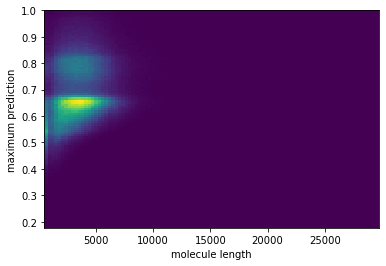

In [371]:
plt.hist2d(len_max_ext_p, pred_max_ext_p, bins = 100)
plt.xlabel('molecule length')
plt.ylabel('maximum prediction')
plt.show()

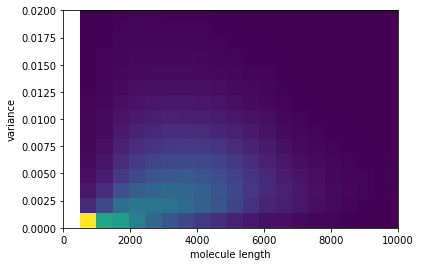

In [375]:
# 2D hist of variance vs length

usesamples = [19,43,53,27,51,56,67,71,74]
var_ext = []

for samp in usesamples:
    var_ext.extend(var_plot[samp])


var_ext = np.array(var_ext)
var_ext_p = var_ext[~np.isnan(pred_max_ext)]

plt.hist2d(len_max_ext_p, var_ext_p, bins = 60)
plt.xlabel('molecule length')
plt.ylabel('variance')
# plotter.colorbar(histo[3], extend='min')
plt.xlim([0,10000])
plt.ylim([0,0.02])
plt.show()

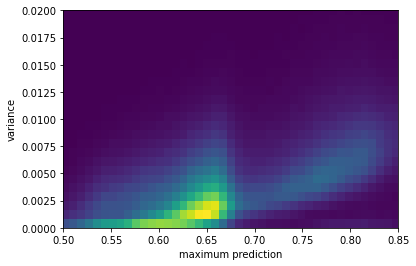

In [396]:
# 2D hist of variance vs max

usesamples = [19,43,53,27,51,56,67,71,74]


plt.hist2d(pred_max_ext_p, var_ext_p, bins = 100)
plt.xlabel('maximum prediction')
plt.ylabel('variance')
# plotter.colorbar(histo[3], extend='min')
plt.xlim([0.5,0.85])
plt.ylim([0,0.02])
plt.show()

# Plot footprint sizes stratified by max predictions and variance
 compare footprint sizes at different max and variance cutoffs

In [4]:
# max prediction cutoffs
usesamples = [19,43,53,27,51,56,67,71,74]
# usesamples = [74]


max_cutoff = np.arange(0.70,1,0.05)

below_max_c = []
key_err_tot = {}
for samp in usesamples:
    count = 0
    for zmw in max_all[samp].keys():
        if max_all[samp][zmw] < max_cutoff[0]:
            try:
                below_max_c.extend(inacc[samp][zmw])  
            except KeyError:
                count += 1
                continue
            
    key_err_tot[samp] = count
# plt.hist(below_max_c,bins = 100)

# for i in range(0,len(max_cutoff)):
#     above_max_c = []
above_max_c = []
key_err_above_tot = {}
for samp in usesamples:
    count = 0
    for zmw in max_all[samp].keys():
        if max_all[samp][zmw] >= max_cutoff[i]:
            try:
                above_max_c.extend(inacc[samp][zmw])  
            except KeyError:
                count +=1
                continue
    key_err_above_tot[samp] = count
        
#     plt.hist(above_max_c,bins = 100)

# plt.show()


NameError: name 'max_all' is not defined

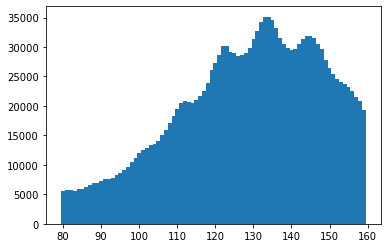

In [89]:
plt.hist(below_max_c, bins=np.arange(79.5,160.5,1))
plt.show()

In [81]:
len(above_max_c)

0

In [ ]:
inacc[samp][zmw]

In [56]:
samp

19

In [59]:
zmw

180554545

In [8]:
count_same_zmws = {}
skipped_zmws = {}
for samp in usesamples:
    disc_zmws = []
    count = 0
    for zmw in max_all[samp].keys():
        if zmw in inacc[samp].keys():
            count += 1
        else:
            disc_zmws.append(zmw)
            
    skipped_zmws[samp] = disc_zmws
    count_same_zmws[samp] = count

In [9]:
for samp in usesamples:
    print(len(skipped_zmws[samp]))

61
1
323110


In [87]:
for samp in usesamples:
    discrepency = len(max_all[samp].keys()) - count_same_zmws[samp]
    print(discrepency)
    print(key_err_tot[samp])
    print(key_err_above_tot[samp])
    print(len(max_all[samp].keys()))
    print(count_same_zmws[samp])
#     print(len(max_all[samp].keys()))
#     print(count_same_zmws[samp])

61
58
0
30519
30458
1
0
0
596
595
323110
281979
0
323173
63
2790
2011
0
15634
12844
1
0
0
241
240
293681
132539
0
293716
35
34
26
0
50569
50535
21
17
0
38889
38868
53
42
0
275372
275319


In [40]:
max_all[74][180554545] < max_cutoff[0]

True

In [28]:
range(0,len(max_cutoff)+1)

range(0, 8)

In [48]:
inacc[samp][zmw]

KeyError: 180554545

In [31]:
for samp in usesamples:
    print(key_err_tot[samp])

29767
449
282037
11219
170
132555
23263
13963
134584


In [7]:
len(max_all[samp].keys())

30519

In [6]:
len(pred_all[samp].keys())

30519

In [8]:
len(inacc[samp].keys())

65037

In [ ]:
# variance thresholding
var_all[19].keys()

# examining zmws not in max_all

In [3]:
lenall = {}

for samp in [19,43,53,27,51,56,67,71,74]:
    if samp == 53 or samp == 56:
        samplengths = {}
        with open(hmmPBase + '{0}/processed_MO/full/{0}_{1}_full.pickle'.format(sampleRef['cell'][samp],
                                                                                 sampleRef['sampleName'][samp]), 'rb') as m_fin:
            datain = pickle.load(m_fin)
            for zmw in datain.keys():
                rl = len(datain[zmw]['read'])
                samplengths[zmw] = rl
            lenall[samp] = samplengths    
    
    else:
        samplengths = {}
        with open(hmmPBase + '{0}/processed/full/{0}_{1}_full.pickle'.format(sampleRef['cell'][samp],
                                                                                 sampleRef['sampleName'][samp]), 'rb') as m_fin:
            datain = pickle.load(m_fin)
            for zmw in datain.keys():
                rl = len(datain[zmw]['read'])
                samplengths[zmw] = rl
            lenall[samp] = samplengths
    

KeyboardInterrupt: 

In [97]:
skipped_zmws[samp]

[6488327,
 10224177,
 11272787,
 12976286,
 14682362,
 27001903,
 28313502,
 31458474,
 31918500,
 35520513,
 38471996,
 40240856,
 53805159,
 55051217,
 56557660,
 58460543,
 60491506,
 63374954,
 64618924,
 65339429,
 74975871,
 76941657,
 85393562,
 87818256,
 91160754,
 93129190,
 98566274,
 100533679,
 105448376,
 107544849,
 108137087,
 115671237,
 115804696,
 121438576,
 123470399,
 124125485,
 125241405,
 125635117,
 126945789,
 134416045,
 141427205,
 151128140,
 152176351,
 153094927,
 160170528,
 163382862,
 163580668,
 169806067,
 173475457,
 175965971,
 177670449,
 178783756,
 180554545]

In [96]:
lenall[samp]

{35: 2735,
 4: 4422,
 14: 1151,
 18: 2753,
 225: 1856,
 75: 1786,
 32: 5266,
 256: 1749,
 144: 4933,
 251: 4523,
 366: 3418,
 222: 4359,
 374: 1649,
 117: 4572,
 104: 2274,
 301: 2294,
 253: 7732,
 235: 1482,
 320: 2507,
 502: 4264,
 519: 2406,
 436: 5405,
 422: 1671,
 452: 3833,
 530: 2587,
 501: 1888,
 586: 4208,
 533: 2135,
 474: 1488,
 589: 4570,
 578: 5268,
 552: 6363,
 737: 3620,
 787: 2410,
 849: 2318,
 857: 4733,
 545: 4779,
 928: 2310,
 915: 1919,
 860: 2318,
 930: 5398,
 784: 2155,
 931: 3880,
 1036: 2760,
 838: 2324,
 1003: 5269,
 1054: 2189,
 734: 1928,
 939: 6006,
 1085: 4637,
 1091: 1290,
 1112: 1792,
 1120: 8767,
 1111: 2078,
 727: 2528,
 1277: 2721,
 1167: 1425,
 1266: 3892,
 1067: 6278,
 1128: 2618,
 1252: 4662,
 1334: 1952,
 1411: 1891,
 1427: 4799,
 1408: 2052,
 1433: 3612,
 1305: 2371,
 1516: 5714,
 1546: 1659,
 1554: 2273,
 1431: 3638,
 1467: 1452,
 1551: 4347,
 1600: 1056,
 1396: 4202,
 1182: 4629,
 1430: 2295,
 1633: 3071,
 1564: 4874,
 1749: 1774,
 1670: 3203,
 

# Comparing average accessibility in mature vs nascent fibers

In [4]:
# make a dictionary of sample IDs and then for each sample a dictionary of zmws and HMMout files
# use the existing HMMres files at ~/brdu/HMMres_plus_minus_BrdU

# usesamples = [19,21,23,25,27,43,45,47,49,51,53,54,55,56,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,82,
#               83,84,85,86,87,88,89,90,91,92,93] # all in vivo mESC samples

usesamples = [53,54,55,56,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,82,83,84,85,86,87,88,
              89,90,92,93] # all in vivo mESC samples, excluding MNase samples

HMMresdb = '/wynton/home/ramani/mostrowski/brdu/HMMres_plus_minus_BrdU/'

HMMres_minusB = {}
HMMres_plusB = {}

for samp in usesamples:
    # read in minus BrdU file
    with open(HMMresdb + '{0}_{1}_HMMres_minusB.pickle'.format(sampleRef['cell'][samp],
                                                               sampleRef['sampleName'][samp]), 'rb') as m_fin:
        HMM_minus_in = pickle.load(m_fin)
   
    # read in plus BrdU file
    with open(HMMresdb + '{0}_{1}_HMMres_plusB.pickle'.format(sampleRef['cell'][samp],
                                                               sampleRef['sampleName'][samp]), 'rb') as p_fin:
        HMM_plus_in = pickle.load(p_fin)    
    
    HMMres_minusB[samp] = HMM_minus_in
    HMMres_plusB[samp] = HMM_plus_in
    
    print('finished: ' + str(sampleRef['sampleName'][samp]))

finished: negcontrol_m
finished: 5minBrdU_m
finished: 15minBrdU_m
finished: 24hBrdU_m
finished: 5minBrdU_m_280_rep1
finished: 15minBrdU_m_280_rep1
finished: 24hBrdU_m_280_rep1
finished: 10min_BrdU
finished: 1hr_BrdU
finished: 6hr_BrdU
finished: 24hr_BrdU
finished: 5minBrdU_m_210128
finished: 15minBrdU_m_210128
finished: 24hBrdU_m_210128
finished: 10min_BrdU_220920
finished: 1hr_BrdU_220920
finished: 6hr_BrdU_220920
finished: CldU_24h_m
finished: IdU_24h_m
finished: 10min_untreated__rep1
finished: 10min_untreated__rep2
finished: 15min_untreated__rep1
finished: 15min_untreated__rep2
finished: 1hr_untreated__rep1
finished: 1hr_untreated__rep2
finished: 10min_treated__rep1
finished: 10min_treated__rep2
finished: 15min_treated__rep1
finished: 1hr_treated__rep1
finished: 1hr_treated__rep2


In [5]:
# average the accessibility of each molecule
# iterate through each samp and each zmw

zmw_avg_m = []
zmw_avg_p = []
zmw_avg_all_m = {}
zmw_avg_all_p = {}

all_avg_m = {}
all_avg_p = {}

for samp in usesamples:
    for zmw in HMMres_minusB[samp].keys():
        zmw_avg_m.append(np.nanmean(HMMres_minusB[samp][zmw]))
        
    
    for zmw in HMMres_plusB[samp].keys():
        zmw_avg_p.append(np.nanmean(HMMres_plusB[samp][zmw]))
    
    zmw_avg_all_m[samp] = zmw_avg_m # one average value per zmw separated by sample
    zmw_avg_all_p[samp] = zmw_avg_p
    
    avg_avg_m = np.nanmean(zmw_avg_m) # average of all the zmws in the sample
    avg_avg_p = np.nanmean(zmw_avg_p)
    
    all_avg_m[samp] = avg_avg_m
    all_avg_p[samp] = avg_avg_p
    
    print('finished: ' + str(sampleRef['sampleName'][samp]))

finished: negcontrol_m
finished: 5minBrdU_m
finished: 15minBrdU_m
finished: 24hBrdU_m
finished: 5minBrdU_m_280_rep1
finished: 15minBrdU_m_280_rep1
finished: 24hBrdU_m_280_rep1
finished: 10min_BrdU
finished: 1hr_BrdU
finished: 6hr_BrdU
finished: 24hr_BrdU
finished: 5minBrdU_m_210128
finished: 15minBrdU_m_210128
finished: 24hBrdU_m_210128
finished: 10min_BrdU_220920
finished: 1hr_BrdU_220920
finished: 6hr_BrdU_220920
finished: CldU_24h_m
finished: IdU_24h_m
finished: 10min_untreated__rep1
finished: 10min_untreated__rep2
finished: 15min_untreated__rep1
finished: 15min_untreated__rep2
finished: 1hr_untreated__rep1
finished: 1hr_untreated__rep2
finished: 10min_treated__rep1
finished: 10min_treated__rep2
finished: 15min_treated__rep1
finished: 1hr_treated__rep1
finished: 1hr_treated__rep2


In [6]:
len(all_avg_m.keys())

30

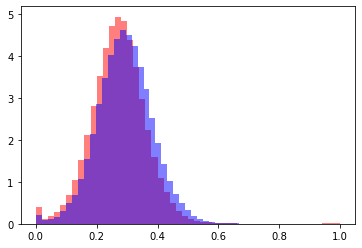

In [46]:
# plot hist of distribution of average accessibility of nascent fibers vs mature for a few samples
sample = 53

plt.hist(zmw_avg_all_m[sample], bins = 50, density = True, color = 'r', alpha = 0.5)
plt.hist(zmw_avg_all_p[sample], bins = 50, density = True, color = 'b', alpha = 0.5)
plt.show()

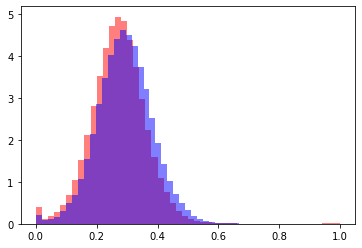

In [47]:
# plot hist of distribution of average accessibility of nascent fibers vs mature for a few samples
sample = 70

plt.hist(zmw_avg_all_m[sample], bins = 50, density = True, color = 'r', alpha = 0.5)
plt.hist(zmw_avg_all_p[sample], bins = 50, density = True, color = 'b', alpha = 0.5)
plt.show()

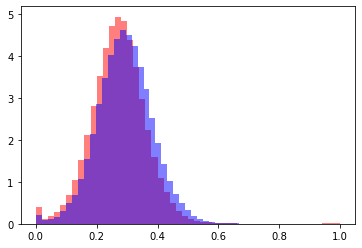

In [48]:
# plot hist of distribution of average accessibility of nascent fibers vs mature for a few samples
sample = 85

plt.hist(zmw_avg_all_m[sample], bins = 50, density = True, color = 'r', alpha = 0.5)
plt.hist(zmw_avg_all_p[sample], bins = 50, density = True, color = 'b', alpha = 0.5)
plt.show()

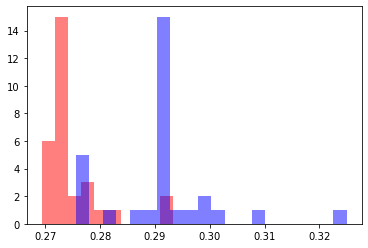

In [78]:
# histogram of the average of each sample's nascent and mature fibers
m_all_hist = []
p_all_hist = []
for samp in usesamples:
    m_all_hist.append(all_avg_m[samp])
    p_all_hist.append(all_avg_p[samp])

plt.hist(m_all_hist, bins = 10, color = 'r', alpha = 0.5)
plt.hist(p_all_hist, bins = 20, color = 'b', alpha = 0.5)
plt.show()

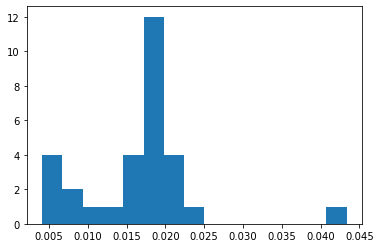

In [64]:
# hist of mature - nascent for each sample
subtracted = []
for i in range(len(m_all_hist)):
    subtracted.append(p_all_hist[i] - m_all_hist[i])

plt.hist(subtracted, bins = 15)
plt.show()

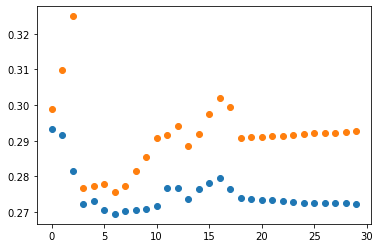

In [81]:
# scatter of the difference between nascent and mature for each sample
# x-axis is sample numbers (range(0,30) with .keys() as the labels)
# y-axis is the predictions
# plot one dot for nascent and one dot for mature


plt.scatter(range(0,30),m_all_hist)
plt.scatter(range(0,30),p_all_hist)
plt.show()

In [110]:
# m_coords = [np.array(range(0,30)),np.array(m_all_hist)]


m_coords= list(m_all_hist)
p_coords= list(p_all_hist)

# p_coords = list(range(0,30))
# p_coords.append(p_all_hist)


In [107]:
m_coords

array([0.29325987, 0.29157275, 0.28157941, 0.27234771, 0.27304563,
       0.27042248, 0.2694448 , 0.27014381, 0.27055222, 0.27096138,
       0.27163755, 0.27664505, 0.27663132, 0.27349521, 0.27656184,
       0.27813737, 0.27954611, 0.27654417, 0.27390125, 0.27365219,
       0.27347417, 0.27329746, 0.27315321, 0.27292565, 0.27258483,
       0.27257247, 0.27251766, 0.27245842, 0.27239908, 0.27230149])

In [111]:
y_coords = np.array([m_coords,p_coords])

In [112]:
y_coords

array([[0.29325987, 0.29157275, 0.28157941, 0.27234771, 0.27304563,
        0.27042248, 0.2694448 , 0.27014381, 0.27055222, 0.27096138,
        0.27163755, 0.27664505, 0.27663132, 0.27349521, 0.27656184,
        0.27813737, 0.27954611, 0.27654417, 0.27390125, 0.27365219,
        0.27347417, 0.27329746, 0.27315321, 0.27292565, 0.27258483,
        0.27257247, 0.27251766, 0.27245842, 0.27239908, 0.27230149],
       [0.29889392, 0.30990063, 0.32492778, 0.27673206, 0.27714969,
        0.27775725, 0.27553821, 0.27738689, 0.28136992, 0.2855303 ,
        0.29066669, 0.29167933, 0.29408344, 0.28852912, 0.29200105,
        0.29752779, 0.30191586, 0.29944657, 0.29083853, 0.29092946,
        0.29102147, 0.29122005, 0.29136883, 0.29165971, 0.29195954,
        0.29206475, 0.29216157, 0.29226593, 0.2924628 , 0.29264686]])

In [113]:
x_coords = np.array([list(range(0,30)),list(range(0,30))])

In [114]:
x_coords

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
labs = []
for samp in usesamples:
    labs.append()

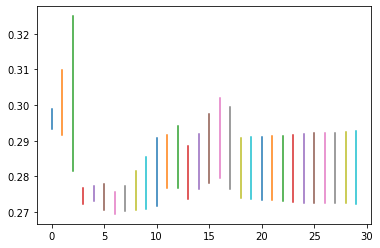

In [116]:
plt.plot(x_coords, y_coords)
plt.xlabels(ticks = range(0,30), labels = )
plt.show()

### Accessibility by technical and biological replicates

In [7]:
all_avg_m[53]

0.29325987415766475

In [8]:
all_avg_p[53]

0.29889392011221805

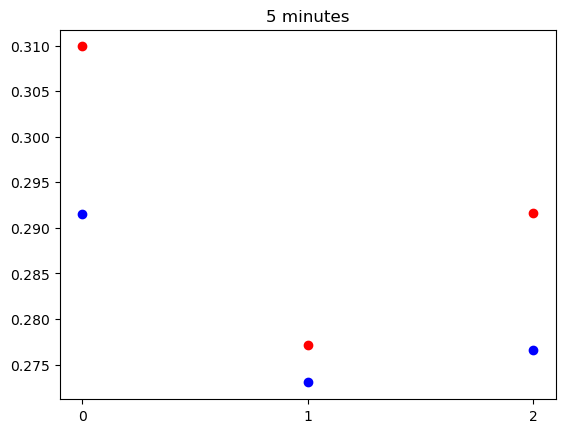

In [40]:
# 5 min - 54,65,72

plt.scatter(0,all_avg_m[54], color = 'b')
plt.scatter(0,all_avg_p[54], color = 'r')
plt.scatter(1,all_avg_m[65], color = 'b')
plt.scatter(1,all_avg_p[65], color = 'r')
plt.scatter(2,all_avg_m[72], color = 'b')
plt.scatter(2,all_avg_p[72], color = 'r')
plt.xticks(range(3))
plt.title('5 minutes')
plt.show()

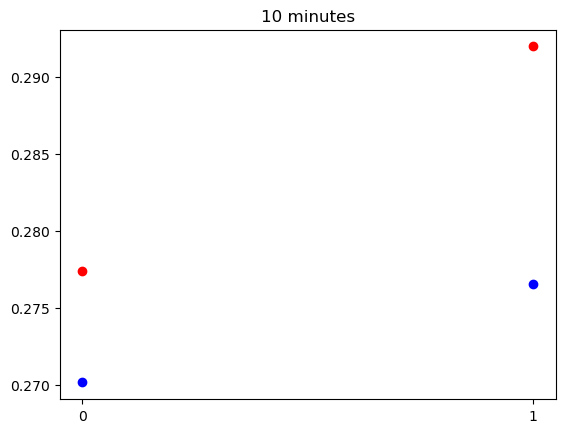

In [41]:
# 10 min - 68,75

plt.scatter(0,all_avg_m[68], color = 'b')
plt.scatter(0,all_avg_p[68], color = 'r')
plt.scatter(1,all_avg_m[75], color = 'b')
plt.scatter(1,all_avg_p[75], color = 'r')
plt.xticks(range(2))
plt.title('10 minutes')
plt.show()

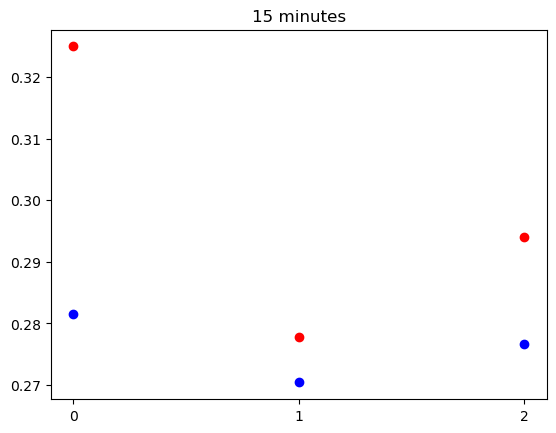

In [39]:
# 15 min - 55,66,73

plt.scatter(0,all_avg_m[55], color = 'b')
plt.scatter(0,all_avg_p[55], color = 'r')
plt.scatter(1,all_avg_m[66], color = 'b')
plt.scatter(1,all_avg_p[66], color = 'r')
plt.scatter(2,all_avg_m[73], color = 'b')
plt.scatter(2,all_avg_p[73], color = 'r')
plt.xticks(range(3))
plt.title('15 minutes')
plt.show()

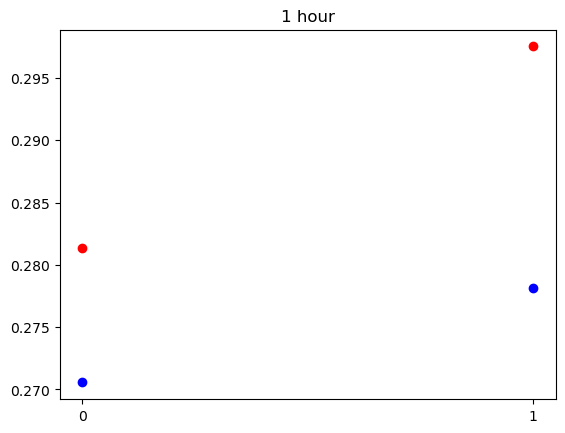

In [38]:
# 1 hour - 69,76
plt.scatter(0,all_avg_m[69], color = 'b')
plt.scatter(0,all_avg_p[69], color = 'r')
plt.scatter(1,all_avg_m[76], color = 'b')
plt.scatter(1,all_avg_p[76], color = 'r')

plt.xticks(range(2))
plt.title('1 hour')
plt.show()

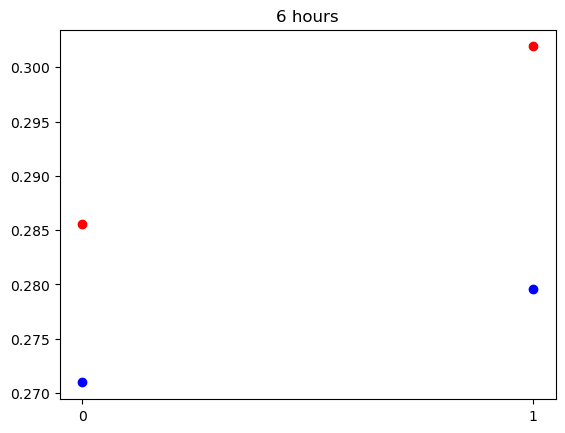

In [37]:
# 6 hours - 70,77

plt.scatter(0,all_avg_m[70], color = 'b')
plt.scatter(0,all_avg_p[70], color = 'r')
plt.scatter(1,all_avg_m[77], color = 'b')
plt.scatter(1,all_avg_p[77], color = 'r')

plt.xticks(range(2))
plt.title('6 hours')
plt.show()

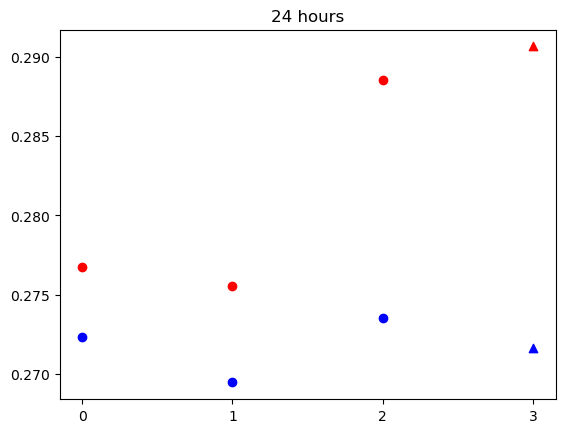

In [36]:
# 24 hours - 56,67,71,74

plt.scatter(0,all_avg_m[56], color = 'b')
plt.scatter(0,all_avg_p[56], color = 'r')
plt.scatter(1,all_avg_m[67], color = 'b')
plt.scatter(1,all_avg_p[67], color = 'r')
plt.scatter(2,all_avg_m[74], color = 'b')
plt.scatter(2,all_avg_p[74], color = 'r')
plt.scatter(3,all_avg_m[71], color = 'b', marker = '^')
plt.scatter(3,all_avg_p[71], color = 'r', marker = '^')

plt.xticks(range(4))
plt.title('24 hours')
plt.show()

# Avg prediction

In [16]:

avg_pred_plus_and_minus = {}
for samp in usesamples:
    plus_preds = list(plus_b[samp].values())
    minus_preds = list(minus_b[samp].values())
    
    plus_and_minus = minus_preds + plus_preds
    
    avg_pred_plus_and_minus[samp] = np.nanmean(plus_and_minus)

In [ ]:
# 5 min - 54,65,72
# 10 min - 68,75
# 15 min - 55,66,73
# 1 hour - 69,76
# 6 hours - 70,77
# 24 hours - 56,67,71,74


In [1]:
plt.scatter(0,avg_pred_plus_and_minus[54], color = 'b')
plt.scatter(0,avg_pred_plus_and_minus[65], color = 'b')
plt.scatter(0,avg_pred_plus_and_minus[72], color = 'b')

plt.scatter(1,avg_pred_plus_and_minus[68], color = 'b')
plt.scatter(1,avg_pred_plus_and_minus[75], color = 'b')

plt.scatter(2,avg_pred_plus_and_minus[55], color = 'b')
plt.scatter(2,avg_pred_plus_and_minus[66], color = 'b')
plt.scatter(2,avg_pred_plus_and_minus[73], color = 'b')

plt.scatter(3,avg_pred_plus_and_minus[69], color = 'b')
plt.scatter(3,avg_pred_plus_and_minus[76], color = 'b')

plt.scatter(4,avg_pred_plus_and_minus[70], color = 'b')
plt.scatter(4,avg_pred_plus_and_minus[77], color = 'b')

plt.scatter(5,avg_pred_plus_and_minus[56], color = 'b')
plt.scatter(5,avg_pred_plus_and_minus[67], color = 'b')
plt.scatter(5,avg_pred_plus_and_minus[71], color = 'r')
plt.scatter(5,avg_pred_plus_and_minus[74], color = 'b')

NameError: name 'plt' is not defined